### 진천 (6개 건물) : 10/14까지 학습 나머지 테스트

### 3:총전력 / 5:통합제어관리실 / 7:보건소 / 9:어린이집 / 11:도서관 / 13:고등학교 / 15:문화의집


In [20]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_1022_v05.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']<'2019-10-15']

building = ['3','5','7','9','11','13','15']
range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    total = np.hstack([pw,temp,humd,wday])
    X_train, y_train = create_dataset(total,pw)
    
    print(X_train.shape)
    print(y_train.shape)

    model = Sequential()
    model.add(LSTM(32,input_shape=(X_train.shape[1],4),return_sequences=True))
    model.add(LSTM(32,input_shape=(X_train.shape[1],4)))
    # model.add(TimeDistributed(Dense(1)))
    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

    from keras.models import model_from_json

    model_json = model.to_json()
    jsonname = 'jc_model_' + bd + '.json'
    h5name = 'jc_model_' + bd +'.h5'
    with open(jsonname,"w") as json_file:
        json_file.write(model_json)

    model.save_weights(h5name)
    print("Saved model to disk")
print('finished!!!')    
    
    


(19859, 192, 4)
(19859, 1)
Epoch 1/100
 - 33s - loss: 0.1608
Epoch 2/100
 - 31s - loss: 0.1272
Epoch 3/100
 - 31s - loss: 0.1217
Epoch 4/100
 - 35s - loss: 0.1186
Epoch 5/100
 - 32s - loss: 0.1178
Epoch 6/100
 - 33s - loss: 0.1134
Epoch 7/100
 - 31s - loss: 0.1103
Epoch 8/100
 - 33s - loss: 0.1111
Epoch 9/100
 - 33s - loss: 0.1098
Epoch 10/100
 - 32s - loss: 0.1094
Epoch 11/100
 - 34s - loss: 0.1089
Epoch 12/100
 - 34s - loss: 0.1075
Epoch 13/100
 - 34s - loss: 0.1074
Epoch 14/100
 - 33s - loss: 0.1063
Epoch 15/100
 - 33s - loss: 0.1065
Epoch 16/100
 - 31s - loss: 0.1059
Epoch 17/100
 - 32s - loss: 0.1051
Epoch 18/100
 - 33s - loss: 0.1059
Epoch 19/100
 - 32s - loss: 0.1055
Epoch 20/100
 - 33s - loss: 0.1024
Epoch 21/100
 - 34s - loss: 0.1035
Epoch 22/100
 - 35s - loss: 0.0991
Epoch 23/100
 - 32s - loss: 0.0986
Epoch 24/100
 - 33s - loss: 0.0952
Epoch 25/100
 - 32s - loss: 0.0951
Epoch 26/100
 - 34s - loss: 0.0946
Epoch 27/100
 - 35s - loss: 0.0911
Epoch 28/100
 - 36s - loss: 0.0893
Ep

 - 31s - loss: 0.0527
Epoch 33/100
 - 34s - loss: 0.0528
Epoch 34/100
 - 33s - loss: 0.0527
Epoch 35/100
 - 33s - loss: 0.0524
Epoch 36/100
 - 31s - loss: 0.0519
Epoch 37/100
 - 37s - loss: 0.0525
Epoch 38/100
 - 39s - loss: 0.0521
Epoch 39/100
 - 39s - loss: 0.0522
Epoch 40/100
 - 39s - loss: 0.0520
Epoch 41/100
 - 37s - loss: 0.0515
Epoch 42/100
 - 42s - loss: 0.0511
Epoch 43/100
 - 39s - loss: 0.0515
Epoch 44/100
 - 35s - loss: 0.0520
Epoch 45/100
 - 36s - loss: 0.0521
Epoch 46/100
 - 34s - loss: 0.0512
Epoch 47/100
 - 35s - loss: 0.0507
Epoch 48/100
 - 35s - loss: 0.0519
Epoch 49/100
 - 34s - loss: 0.0510
Epoch 50/100
 - 39s - loss: 0.0505
Epoch 51/100
 - 40s - loss: 0.0508
Epoch 52/100
 - 38s - loss: 0.0500
Epoch 53/100
 - 36s - loss: 0.0503
Epoch 54/100
 - 36s - loss: 0.0500
Epoch 55/100
 - 36s - loss: 0.0510
Epoch 56/100
 - 33s - loss: 0.0505
Epoch 57/100
 - 32s - loss: 0.0501
Epoch 58/100
 - 31s - loss: 0.0504
Epoch 59/100
 - 31s - loss: 0.0498
Epoch 60/100
 - 30s - loss: 0.052

 - 62s - loss: 0.0665
Epoch 65/100
 - 63s - loss: 0.0664
Epoch 66/100
 - 62s - loss: 0.0671
Epoch 67/100
 - 63s - loss: 0.0663
Epoch 68/100
 - 63s - loss: 0.0678
Epoch 69/100
 - 70s - loss: 0.0658
Epoch 70/100
 - 73s - loss: 0.0675
Epoch 71/100
 - 63s - loss: 0.0659
Epoch 72/100
 - 63s - loss: 0.0668
Epoch 73/100
 - 60s - loss: 0.0664
Epoch 74/100
 - 58s - loss: 0.0662
Epoch 75/100
 - 63s - loss: 0.0662
Epoch 76/100
 - 62s - loss: 0.0666
Epoch 77/100
 - 57s - loss: 0.0664
Epoch 78/100
 - 56s - loss: 0.0663
Epoch 79/100
 - 57s - loss: 0.0672
Epoch 80/100
 - 58s - loss: 0.0649
Epoch 81/100
 - 62s - loss: 0.0657
Epoch 82/100
 - 61s - loss: 0.0653
Epoch 83/100
 - 65s - loss: 0.0651
Epoch 84/100
 - 63s - loss: 0.0654
Epoch 85/100
 - 61s - loss: 0.0658
Epoch 86/100
 - 60s - loss: 0.0655
Epoch 87/100
 - 57s - loss: 0.0667
Epoch 88/100
 - 56s - loss: 0.0662
Epoch 89/100
 - 56s - loss: 0.0711
Epoch 90/100
 - 56s - loss: 0.0710
Epoch 91/100
 - 59s - loss: 0.0671
Epoch 92/100
 - 56s - loss: 0.067

 - 47s - loss: 0.0549
Epoch 97/100
 - 47s - loss: 0.0547
Epoch 98/100
 - 47s - loss: 0.0554
Epoch 99/100
 - 47s - loss: 0.0561
Epoch 100/100
 - 47s - loss: 0.0560
Saved model to disk
finished!!!


In [ ]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_1023_v05.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
# df = df[df['datetime']<'2019-10-15']

building = ['3','5','7','9','11','13','15']
range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    print(min(pw))
    print(max(pw))
    print('-'*50)
#     temp = np.array(df['temperature'])
#     temp = temp.reshape(temp.shape[0],1)
#     humd = np.array(df['humidity'])
#     humd = humd.reshape(humd.shape[0],1)
#     wday = np.array(df['weekday'])
#     wday = wday.reshape(wday.shape[0],1)

#     pw = minmax_scaler(pw, range_dict[bd])
#     temp = minmax_scaler(temp, [-40,40])
#     humd = minmax_scaler(humd, [0,100])
#     wday = minmax_scaler(wday, [0,6])
    
#     total = np.hstack([pw,temp,humd,wday])
#     X_train, y_train = create_dataset(total,pw)
    
#     print(X_train.shape)
#     print(y_train.shape)

#     model = Sequential()
#     model.add(LSTM(32,input_shape=(X_train.shape[1],4),return_sequences=True))
#     model.add(LSTM(32,input_shape=(X_train.shape[1],4)))
#     # model.add(TimeDistributed(Dense(1)))
#     model.add(Dense(1))

#     model.compile(loss='mae', optimizer='adam')
#     model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

#     from keras.models import model_from_json

#     model_json = model.to_json()
#     jsonname = 'jc_model(kW)_' + bd + '.json'
#     h5name = 'jc_model(kW)_' + bd +'.h5'
#     with open(jsonname,"w") as json_file:
#         json_file.write(model_json)

#     model.save_weights(h5name)
#     print("Saved model to disk")
# print('finished!!!')    
    
    


## 전력 소비 예측 테스트

### kWh

975
3 start


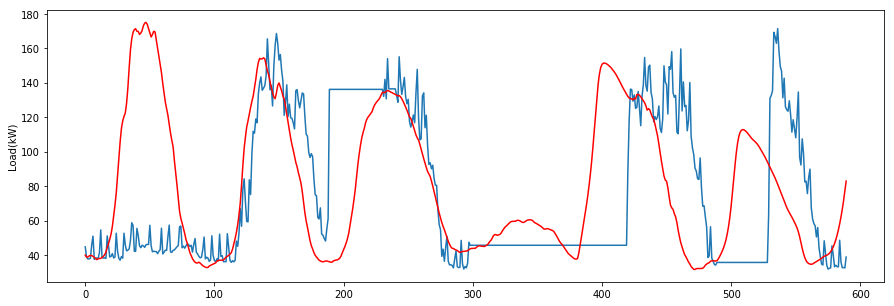

5 start


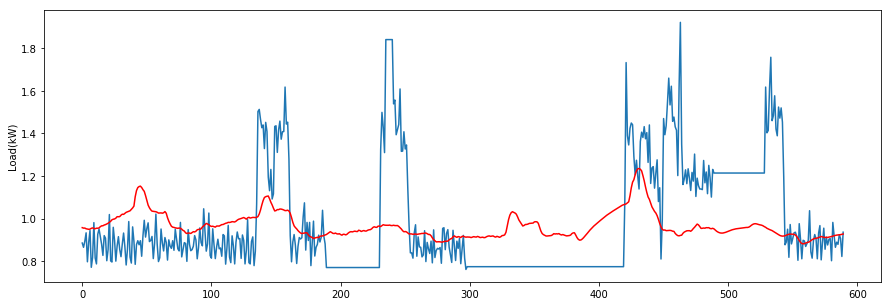

7 start


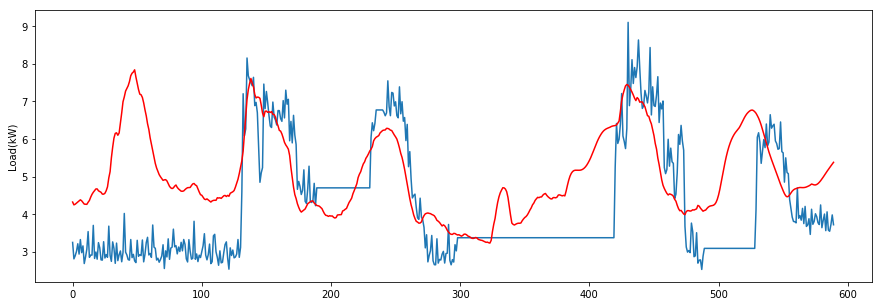

9 start


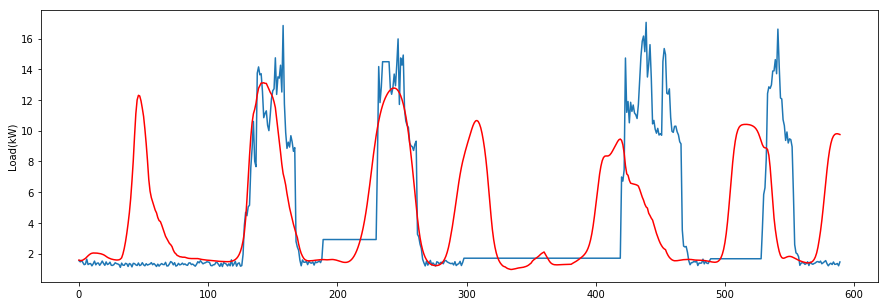

11 start


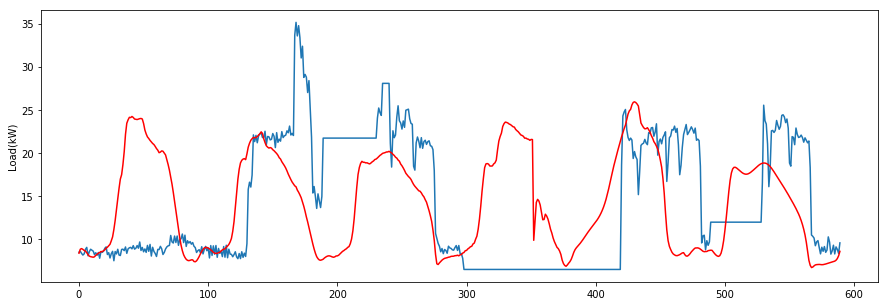

13 start


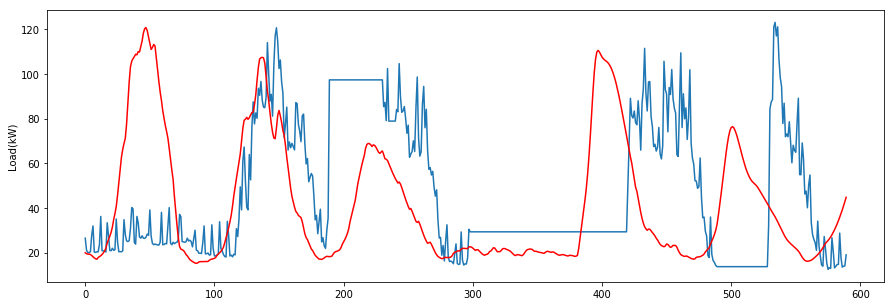

15 start


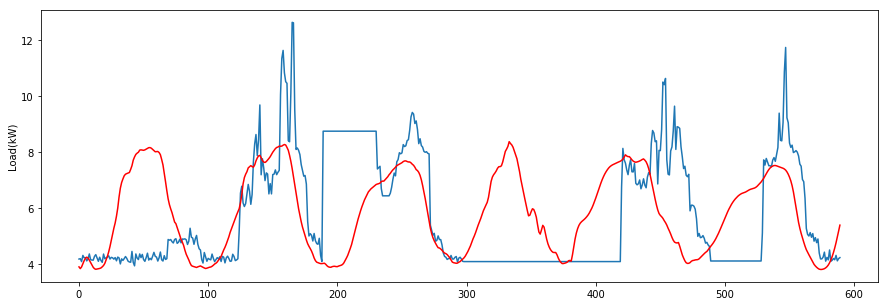

In [73]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

dir = '/Users/xiilab/Documents/파이썬/22222/'
# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_1023_v05.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']>='2019-10-05']
print(len(df))
building = ['3','5','7','9','11','13','15']
# range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
range_dict = {'3':[10,250], '5':[0,5], '7':[0,15], '9':[0,30],'11':[0,50],'13':[5,180],'15':[0,20]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)

    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    Test = np.hstack([pw,temp,humd,wday])
    
    print(bd + ' start')
    json_file = open(dir+'jc_model(kW)_'+bd+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights(dir+'jc_model(kW)_'+bd+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    y_test = []
    
    i = 0; cnt = 0
    while (i < len(Test)-385):
        
            # print(cnt)
        X_test, test_y = create_dataset(Test[i:i+385],pw[i:i+385],192)
        pred = model.predict(X_test)
#         pred = pred*(power_max - power_min) + power_min
#         test_y = test_y*(power_max - power_min) + power_min
        predictions.append(pred)
#         predictions = np.append(predictions, pred)
#         y_test = np.append(y_test,test_y)
        y_test.append(test_y)

        i += 1
        cnt += 1
        ########################################################

#     y_test = y_test.reshape(y_test.shape[0],1)
#     predictions = predictions.reshape(predictions.shape[0],1)
    ##### inverse transform ##############
    y_test = inverse_scaler(np.array(y_test),range_dict[bd])
    predictions = inverse_scaler(np.array(predictions),range_dict[bd])
#     print(predictions)
    y_test = np.vstack(y_test).squeeze()
    predictions = np.vstack(predictions).squeeze()
#     predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#     pred = predictions[0]*(power_max - power_min) + power_min
    
#     mape = 0
#     count = 0
#     for i in range(len(y_test)):
#         if (y_test[i] != 0) & (predictions[i] != 0):
#             if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
#                 mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
#                 count +=1
#             else:
#                 mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
#                 count +=1

#     mape /= count

#     print('Mean Absolute Percentage Error : %.3f' % (mape*100))
#     print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
    plt.ylabel('Load(kW)')
    plt.plot(y_test)
    plt.plot(predictions,'r')
    # plt.title(name)
    plt.show()    
#     X_train, y_train = create_dataset(total,pw)

### kW

In [ ]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_1023_v05.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']>='2019-10-15']

building = ['3','5','7','9','11','13','15']
# range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)

    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    Test = np.hstack([pw,temp,humd,wday])
    
    print(bd + ' start')
    json_file = open('jc_model_'+bd+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('jc_model_'+bd+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    y_test = []
    
    i = 0; cnt = 0
    while (i < len(Test)-385):

        X_test, test_y = create_dataset(Test[i:i+385],pw[i:i+385],192)
        pred = model.predict(X_test)
        predictions.append(pred)
        y_test.append(test_y)

        i += 1
        cnt += 1
        ########################################################

#     y_test = y_test.reshape(y_test.shape[0],1)
#     predictions = predictions.reshape(predictions.shape[0],1)
    ##### inverse transform ##############
    y_test = inverse_scaler(y_test)
    predictions = inverse_scaler(predictions)
    predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#     pred = predictions[0]*(power_max - power_min) + power_min
    
    mape = 0
    count = 0
    for i in range(len(y_test)):
        if (y_test[i] != 0) & (predictions[i] != 0):
            if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
                mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
                count +=1
            else:
                mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
                count +=1

    mape /= count

    print('Mean Absolute Percentage Error : %.3f' % (mape*100))
    print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
    plt.ylabel('Load(kW)')
    plt.plot(y_test)
    plt.plot(predictions,'r')
    # plt.title(name)
    plt.show()    
#     X_train, y_train = create_dataset(total,pw)

## 모닝마트, 인쇄소 전력 소비 예측 

### 589: 모닝마트 / 597 : 인쇄소

In [ ]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_1022_v05.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']<'2019-10-15']

building = ['589','597']
# range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    total = np.hstack([pw,temp,humd,wday])
    X_train, y_train = create_dataset(total,pw)
    
    print(X_train.shape)
    print(y_train.shape)

    model = Sequential()
    model.add(LSTM(32,input_shape=(X_train.shape[1],4),return_sequences=True))
    model.add(LSTM(32,input_shape=(X_train.shape[1],4)))
    # model.add(TimeDistributed(Dense(1)))
    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

    from keras.models import model_from_json

    model_json = model.to_json()
    jsonname = 'jc_model_' + bd + '.json'
    h5name = 'jc_model_' + bd +'.h5'
    with open(jsonname,"w") as json_file:
        json_file.write(model_json)

    model.save_weights(h5name)
    print("Saved model to disk")
print('finished!!!')    
    
    


## 모닝마트 / 인쇄소 전력 소비 예측 테스트

589 start


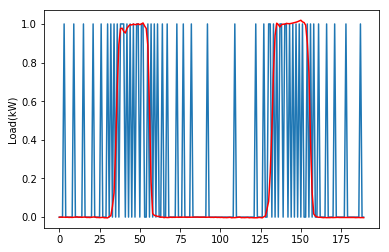

597 start


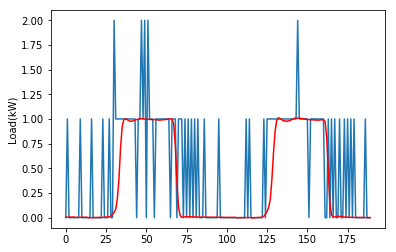

In [46]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/jc_bd2.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']>'2019-10-10']

building = ['589','597']
# range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

#     pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    Test = np.hstack([pw,temp,humd,wday])
    
    print(bd + ' start')
    json_file = open('jc_model_'+bd+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('jc_model_'+bd+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    y_test = []
    
    i = 0; cnt = 0
    while (i < len(Test)-385):
        
            # print(cnt)
        X_test, test_y = create_dataset(Test[i:i+385],pw[i:i+385],192)
        pred = model.predict(X_test)
#         pred = pred*(power_max - power_min) + power_min
#         test_y = test_y*(power_max - power_min) + power_min
        predictions.append(pred)
#         predictions = np.append(predictions, pred)
#         y_test = np.append(y_test,test_y)
        y_test.append(test_y)

        i += 1
        cnt += 1
        ########################################################
    predictions = np.vstack(predictions).squeeze()
    y_test = np.vstack(y_test).squeeze()
#     y_test = y_test.reshape(y_test.shape[0],1)
#     predictions = predictions.reshape(predictions.shape[0],1)
    ##### inverse transform ##############
#     y_test = inverse_scaler(np.array(y_test),range_dict[bd])
#     predictions = inverse_scaler(np.array(predictions),range_dict[bd])
#     print(predictions)
#     y_test = np.vstack(y_test).squeeze()
#     predictions = np.vstack(predictions).squeeze()
#     predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#     pred = predictions[0]*(power_max - power_min) + power_min
    
#     mape = 0
#     count = 0
#     for i in range(len(y_test)):
#         if (y_test[i] != 0) & (predictions[i] != 0):
#             if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
#                 mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
#                 count +=1
#             else:
#                 mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
#                 count +=1

#     mape /= count

#     print('Mean Absolute Percentage Error : %.3f' % (mape*100))
#     print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
    plt.ylabel('Load(kW)')
    plt.plot(y_test)
    plt.plot(predictions,'r')
    # plt.title(name)
    plt.show()    

589 start


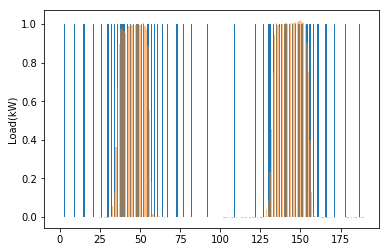

597 start


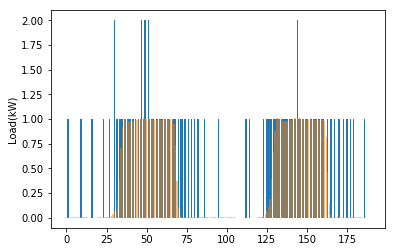

In [58]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/jc_bd2.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
df = df[df['datetime']<'2019-10-16']
df = df[df['datetime']>'2019-10-10']

building = ['589','597']
# range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

#     pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    Test = np.hstack([pw,temp,humd,wday])
    
    print(bd + ' start')
    json_file = open('jc_model_'+bd+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('jc_model_'+bd+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    y_test = []
    
    i = 0; cnt = 0
    while (i < len(Test)-385):
        
            # print(cnt)
        X_test, test_y = create_dataset(Test[i:i+385],pw[i:i+385],192)
        pred = model.predict(X_test)
#         pred = pred*(power_max - power_min) + power_min
#         test_y = test_y*(power_max - power_min) + power_min
        predictions.append(pred)
#         predictions = np.append(predictions, pred)
#         y_test = np.append(y_test,test_y)
        y_test.append(test_y)

        i += 1
        cnt += 1
        ########################################################
#     print(predictions)
    predictions = np.vstack(predictions).squeeze()
    y_test = np.vstack(y_test).squeeze()
    
    
#     y_test = y_test.reshape(y_test.shape[0],1)
#     predictions = predictions.reshape(predictions.shape[0],1)
    ##### inverse transform ##############
#     y_test = inverse_scaler(np.array(y_test),range_dict[bd])
#     predictions = inverse_scaler(np.array(predictions),range_dict[bd])
#     print(predictions)
#     y_test = np.vstack(y_test).squeeze()
#     predictions = np.vstack(predictions).squeeze()
#     predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#     pred = predictions[0]*(power_max - power_min) + power_min
    
#     mape = 0
#     count = 0
#     for i in range(len(y_test)):
#         if (y_test[i] != 0) & (predictions[i] != 0):
#             if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
#                 mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
#                 count +=1
#             else:
#                 mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
#                 count +=1

#     mape /= count

#     print('Mean Absolute Percentage Error : %.3f' % (mape*100))
#     print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
    plt.ylabel('Load(kW)')
    plt.bar(range(len(y_test)),y_test)
    plt.bar(range(len(predictions)),predictions, alpha=0.5)
#     plt.plot(y_test)
#     plt.plot(predictions,'r')
    # plt.title(name)
    plt.show()    

## 신재생 에너지 
### 실측도 똑같이 이상치 처리해야하고 ... 비슷하게 ...

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Flatten, LSTM, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################

def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
###################################################
range_dict = {'1':[0,170],'solar':[0,1000], '477':[0,2.5], '509':[0,2.5]}

# # 1
# df = pd.read_csv('/Users/xiilab/Downloads/jc_town_neweng.csv')
# solar = np.array(df['solar'])
# solar = solar.reshape(solar.shape[0],1)
# neweng = np.array(df['1'])
# neweng = neweng.reshape(neweng.shape[0],1)

# solar = minmax_scaler(solar, range_dict['solar'])
# neweng = minmax_scaler(neweng, range_dict['1'])

# total = np.hstack[solar, neweng]
# X_train, y_train = create_dataset(total, neweng)

# model = Sequential()
# model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
# model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
# # model.add(TimeDistributed(Dense(1)))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

# from keras.models import model_from_json

# model_json = model.to_json()
# jsonname = 'jc_neweng_model_1.json'
# h5name = 'jc_neweng_model_1.h5'
# with open(jsonname,"w") as json_file:
#     json_file.write(model_json)

# model.save_weights(h5name)
# print("Saved model 1 to disk")


# 2
df = pd.read_csv('/Users/xiilab/Downloads/jc_neweng.csv')
for bd in ['477','509']:
    solar = np.array(df['solar'])
    solar = solar.reshape(solar.shape[0],1)
    neweng = np.array(df[bd])
    neweng = neweng.reshape(neweng.shape[0],1)

    solar = minmax_scaler(solar, range_dict['solar'])
    neweng = minmax_scaler(neweng, range_dict[bd])

    total = np.hstack([solar, neweng])
    X_train, y_train = create_dataset(total, neweng)

    model = Sequential()
    model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
    model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
    # model.add(TimeDistributed(Dense(1)))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

    from keras.models import model_from_json

    model_json = model.to_json()
    jsonname = 'jc_neweng_model_' + bd + '.json'
    h5name = 'jc_neweng_model_' + bd +'.h5'
    with open(jsonname,"w") as json_file:
        json_file.write(model_json)

    model.save_weights(h5name)
    print("Saved model to disk")





Epoch 1/100
 - 15s - loss: 0.1181
Epoch 2/100
 - 8s - loss: 0.1136
Epoch 3/100
 - 8s - loss: 0.1103
Epoch 4/100
 - 8s - loss: 0.1098
Epoch 5/100
 - 8s - loss: 0.1078
Epoch 6/100
 - 8s - loss: 0.1065
Epoch 7/100
 - 8s - loss: 0.1050
Epoch 8/100
 - 7s - loss: 0.1025
Epoch 9/100
 - 8s - loss: 0.0994
Epoch 10/100
 - 8s - loss: 0.0950
Epoch 11/100
 - 8s - loss: 0.0919
Epoch 12/100
 - 8s - loss: 0.0902
Epoch 13/100
 - 7s - loss: 0.0919
Epoch 14/100
 - 8s - loss: 0.0895
Epoch 15/100
 - 7s - loss: 0.0914
Epoch 16/100
 - 7s - loss: 0.0909
Epoch 17/100
 - 7s - loss: 0.0900
Epoch 18/100
 - 7s - loss: 0.0892
Epoch 19/100
 - 7s - loss: 0.0887
Epoch 20/100
 - 7s - loss: 0.0882
Epoch 21/100
 - 8s - loss: 0.0879
Epoch 22/100
 - 7s - loss: 0.0873
Epoch 23/100
 - 7s - loss: 0.0876
Epoch 24/100
 - 7s - loss: 0.0870
Epoch 25/100
 - 7s - loss: 0.0881
Epoch 26/100
 - 7s - loss: 0.0871
Epoch 27/100
 - 7s - loss: 0.0887
Epoch 28/100
 - 7s - loss: 0.0874
Epoch 29/100
 - 7s - loss: 0.0891
Epoch 30/100
 - 7s - l

## 신재생 에너지 생산 예측 테스트

### 진천 총발전전력

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Flatten, LSTM, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################

def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
###################################################
range_dict = {'1':[0,700],'solar':[0,1000], '477':[0,2.5], '509':[0,2.5]}

# 1
df = pd.read_csv('/Users/xiilab/Downloads/neweng_1.csv')
solar = np.array(df['solar'])
solar = solar.reshape(solar.shape[0],1)
neweng = np.array(df['1'])
neweng = neweng.reshape(neweng.shape[0],1)

solar = minmax_scaler(solar, range_dict['solar'])
neweng = minmax_scaler(neweng, range_dict['1'])

total = np.hstack([solar, neweng])
X_train, y_train = create_dataset(total, neweng)

model = Sequential()
model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
# model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

from keras.models import model_from_json

model_json = model.to_json()
jsonname = 'jc_neweng_model_1(kW).json'
h5name = 'jc_neweng_model_1(kW).h5'
with open(jsonname,"w") as json_file:
    json_file.write(model_json)

model.save_weights(h5name)
print("Saved model 1 to disk")


# # 2
# df = pd.read_csv('jc_neweng.csv')
# for bd in ['477','509']:
#     solar = np.array(df['solar'])
#     solar = solar.reshape(solar.shape[0],1)
#     neweng = np.array(df[bd])
#     neweng = neweng.reshape(neweng.shape[0],1)

#     solar = minmax_scaler(solar, range_dict['solar'])
#     neweng = minmax_scaler(neweng, range_dict['1'])

#     total = np.hstack([solar, neweng])
#     X_train, y_train = create_dataset(total, neweng)

#     model = Sequential()
#     model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
#     model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
#     # model.add(TimeDistributed(Dense(1)))
#     model.add(Dense(1))
#     model.compile(loss='mae', optimizer='adam')
#     model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

#     from keras.models import model_from_json

#     model_json = model.to_json()
#     jsonname = 'jc_neweng_model2_' + bd + '.json'
#     h5name = 'jc_neweng_model2_' + bd +'.h5'
#     with open(jsonname,"w") as json_file:
#         json_file.write(model_json)

#     model.save_weights(h5name)
#     print("Saved model to disk")





Epoch 1/100
 - 28s - loss: 0.1117
Epoch 2/100
 - 27s - loss: 0.0686
Epoch 3/100
 - 30s - loss: 0.0568
Epoch 4/100
 - 28s - loss: 0.0539
Epoch 5/100
 - 30s - loss: 0.0523
Epoch 6/100
 - 29s - loss: 0.0513
Epoch 7/100
 - 29s - loss: 0.0507
Epoch 8/100
 - 29s - loss: 0.0503
Epoch 9/100
 - 31s - loss: 0.0501
Epoch 10/100
 - 31s - loss: 0.0512
Epoch 11/100
 - 28s - loss: 0.0520
Epoch 12/100
 - 30s - loss: 0.0524
Epoch 13/100
 - 31s - loss: 0.0525
Epoch 14/100
 - 27s - loss: 0.0517
Epoch 15/100
 - 26s - loss: 0.0510
Epoch 16/100
 - 28s - loss: 0.0500
Epoch 17/100
 - 26s - loss: 0.0494
Epoch 18/100
 - 27s - loss: 0.0493
Epoch 19/100
 - 29s - loss: 0.0491
Epoch 20/100
 - 34s - loss: 0.0486
Epoch 21/100
 - 30s - loss: 0.0483
Epoch 22/100
 - 28s - loss: 0.0482
Epoch 23/100
 - 31s - loss: 0.0480
Epoch 24/100
 - 33s - loss: 0.0480
Epoch 25/100
 - 28s - loss: 0.0478
Epoch 26/100
 - 29s - loss: 0.0477
Epoch 27/100
 - 33s - loss: 0.0476
Epoch 28/100
 - 30s - loss: 0.0480
Epoch 29/100
 - 29s - loss: 0

1535
 start


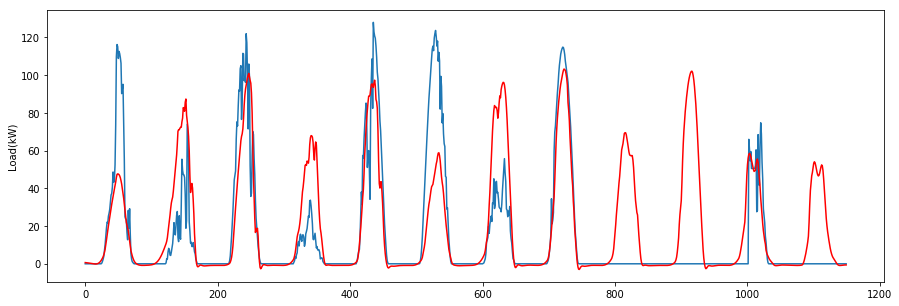

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Flatten, LSTM, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
###################################################
range_dict = {'1':[0,170],'solar':[0,1000], '477':[0,2.5], '509':[0,2.5]}

# 1
df = pd.read_csv('/Users/xiilab/Downloads/jc_town_neweng.csv')
df = df[df['datetime']<'2019-10-16']
df = df[df['datetime']>'2019-09-30']

print(len(df))
solar = np.array(df['solar'])
solar = solar.reshape(solar.shape[0],1)
neweng = np.array(df['1'])
neweng = neweng.reshape(neweng.shape[0],1)

solar = minmax_scaler(solar, range_dict['solar'])
neweng = minmax_scaler(neweng, range_dict['1'])

Test = np.hstack([solar, neweng])
# X_train, y_train = create_dataset(total, neweng)

    
print(' start')
json_file = open('jc_neweng_model_1.json',"r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('jc_neweng_model_1.h5')
model.compile(loss='mse', optimizer='adam')

predictions = []
y_test = []

i = 0; cnt = 0
while (i < len(Test)-385):

        # print(cnt)
    X_test, test_y = create_dataset(Test[i:i+385],neweng[i:i+385],192)
    pred = model.predict(X_test)
#         pred = pred*(power_max - power_min) + power_min
#         test_y = test_y*(power_max - power_min) + power_min
    predictions.append(pred)
#         predictions = np.append(predictions, pred)
#         y_test = np.append(y_test,test_y)
    y_test.append(test_y)

    i += 1
    cnt += 1
    ########################################################
predictions = np.vstack(predictions).squeeze()
y_test = np.vstack(y_test).squeeze()
#     y_test = y_test.reshape(y_test.shape[0],1)
#     predictions = predictions.reshape(predictions.shape[0],1)
##### inverse transform ##############
y_test = inverse_scaler(np.array(y_test),range_dict['1'])
predictions = inverse_scaler(np.array(predictions),range_dict['1'])
#     print(predictions)
#     y_test = np.vstack(y_test).squeeze()
#     predictions = np.vstack(predictions).squeeze()
#     predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#     pred = predictions[0]*(power_max - power_min) + power_min

#     mape = 0
#     count = 0
#     for i in range(len(y_test)):
#         if (y_test[i] != 0) & (predictions[i] != 0):
#             if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
#                 mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
#                 count +=1
#             else:
#                 mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
#                 count +=1

#     mape /= count


#     print('Mean Absolute Percentage Error : %.3f' % (mape*100))
#     print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
plt.rcParams['figure.figsize'] = [15, 5]
plt.ylabel('Load(kW)')

plt.plot(y_test)
plt.plot(predictions,'r')
# plt.title(name)
plt.show()    





### 진천 주택1, 주택2 (모닝마트, 인쇄소)

 start


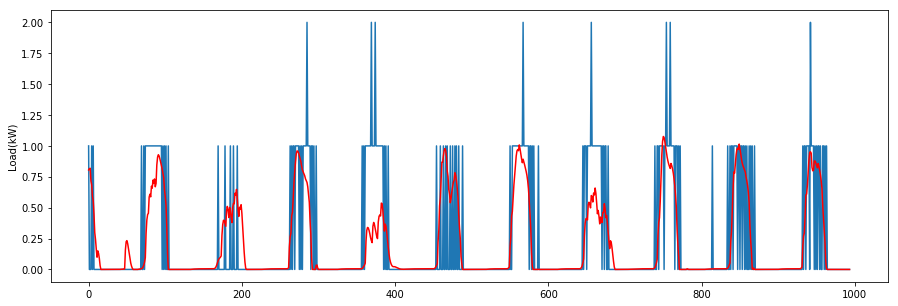

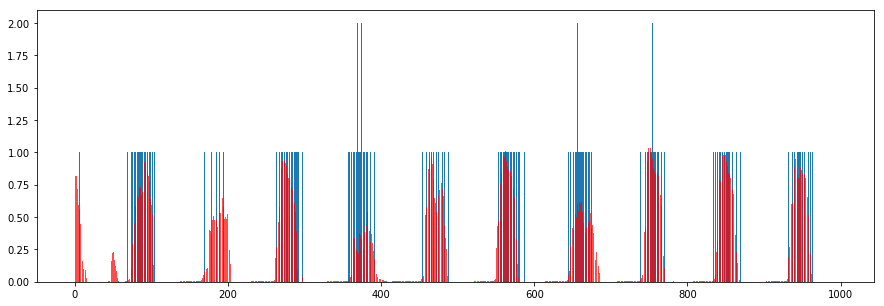

 start


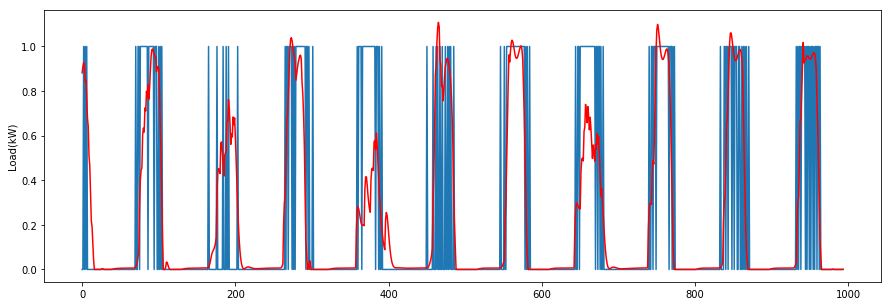

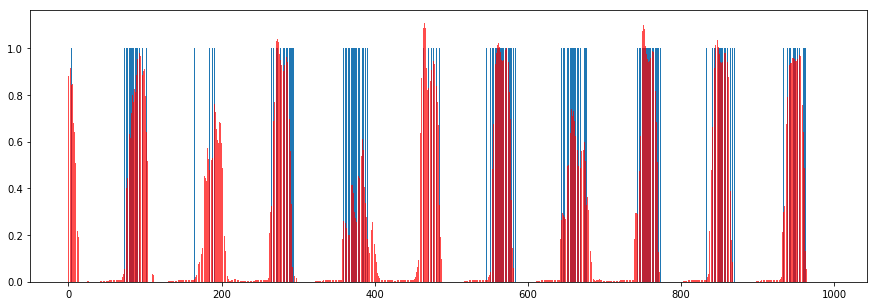

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Flatten, LSTM, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-2*look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+2*(look_back)])
    return np.array(dataX), np.array(dataY)
###################################################
range_dict = {'1':[0,170],'solar':[0,1000], '477':[0,2.5], '509':[0,2.5]}
df = pd.read_csv('/Users/xiilab/Downloads/jc_neweng.csv')
df = df[df['datetime']<'2019-10-16']
df = df[df['datetime']>'2019-09-30']

for bd in ['477','509']:
    #,'509'
    solar = np.array(df['solar'])
    solar = solar.reshape(solar.shape[0],1)
    neweng = np.array(df[bd])
    neweng = neweng.reshape(neweng.shape[0],1)

    solar = minmax_scaler(solar, range_dict['solar'])
    neweng = minmax_scaler(neweng, range_dict[bd])

    Test = np.hstack([solar, neweng])
# X_train, y_train = create_dataset(total, neweng)

    
    print(' start')
    json_file = open('jc_neweng_model_'+bd+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('jc_neweng_model_'+bd+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    y_test = []

    i = 0; cnt = 0
    while (i < len(Test)-385):

            # print(cnt)
        X_test, test_y = create_dataset(Test[i:i+385],neweng[i:i+385],192)
        pred = model.predict(X_test)
    #         pred = pred*(power_max - power_min) + power_min
    #         test_y = test_y*(power_max - power_min) + power_min
        predictions.append(pred)
    #         predictions = np.append(predictions, pred)
    #         y_test = np.append(y_test,test_y)
        y_test.append(test_y)

        i += 1
        cnt += 1
        ########################################################
    predictions = np.vstack(predictions).squeeze()
    y_test = np.vstack(y_test).squeeze()
    #     y_test = y_test.reshape(y_test.shape[0],1)
    #     predictions = predictions.reshape(predictions.shape[0],1)
    ##### inverse transform ##############
    y_test = inverse_scaler(np.array(y_test),range_dict[bd])
    predictions = inverse_scaler(np.array(predictions),range_dict[bd])
    #     print(predictions)
    #     y_test = np.vstack(y_test).squeeze()
    #     predictions = np.vstack(predictions).squeeze()
    predictions = [max(0,predictions[i]) for i in range(len(predictions))]
#         pred = predictions[0]*(power_max - power_min) + power_min

    #     mape = 0
    #     count = 0
    #     for i in range(len(y_test)):
    #         if (y_test[i] != 0) & (predictions[i] != 0):
    #             if(y_test[i] >= np.abs(y_test[i]-predictions[i])):
    #                 mape += np.abs(y_test[i] - predictions[i]) / y_test[i]
    #                 count +=1
    #             else:
    #                 mape += np.abs(y_test[i] - predictions[i]) / predictions[i]
    #                 count +=1

    #     mape /= count


    #     print('Mean Absolute Percentage Error : %.3f' % (mape*100))
    #     print("Mean Absolute Error   %.3f" %(mean_absolute_error(y_test, predictions)))
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.ylabel('Load(kW)')

    plt.plot(y_test)
    plt.plot(predictions,'r')
    # plt.title(name)
    plt.show()    
    
    plt.bar(range(len(y_test)),y_test)
    plt.bar(range(len(predictions)),predictions,color='r',alpha=0.7)
    # plt.title(name)
    plt.show()   





In [75]:
a = [1]
b=np.vstack(a).squeeze()
print(b)

1


In [76]:
a = (i for i in range(10))
print(a)

<generator object <genexpr> at 0x1a3fd6da20>


In [77]:
type(a)

generator

In [78]:
a = tuple(i for i in range(10))
a

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
SELECT * FROM [ZTEC_Center_Jincheon].[dbo].[EnergyWorkResult_2019]WHERE Eng_RDate in ('2019-10-28 11:45:00', '2019-10-21 11:45:00', '2019-10-14 11:45:00') and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc

In [81]:
a = [1,2,3,4,5]
b = a[0:-1]
b

[1, 2, 3, 4]

In [83]:
c = [a[-1]] + b
c

[5, 1, 2, 3, 4]

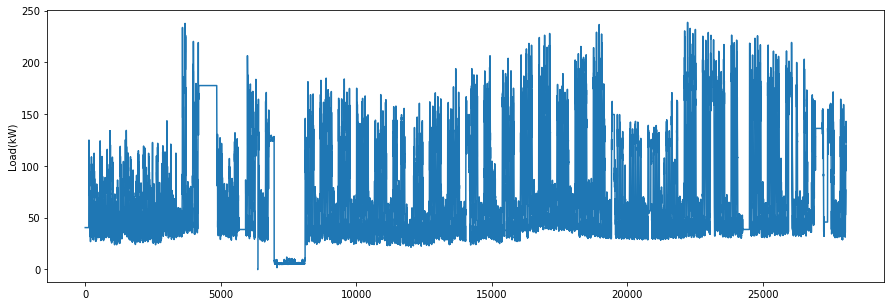

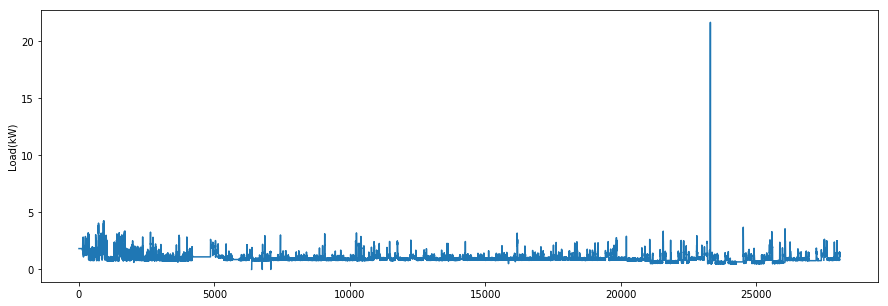

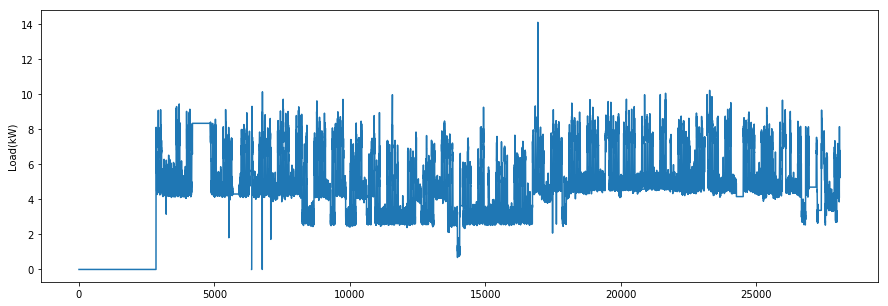

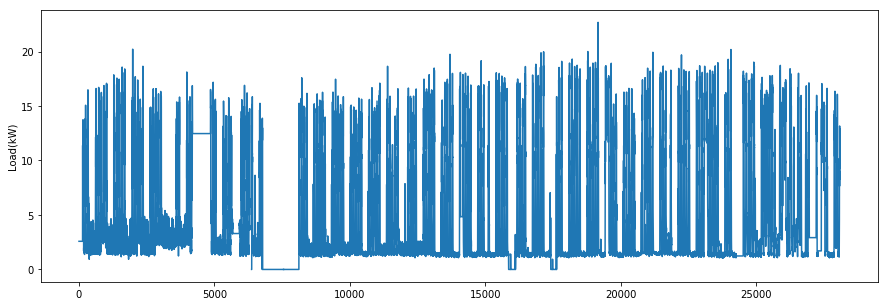

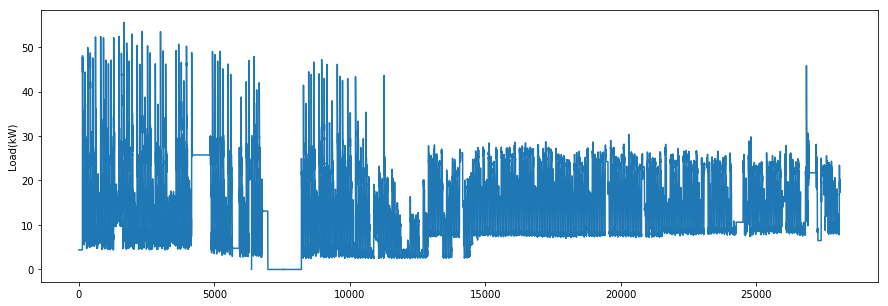

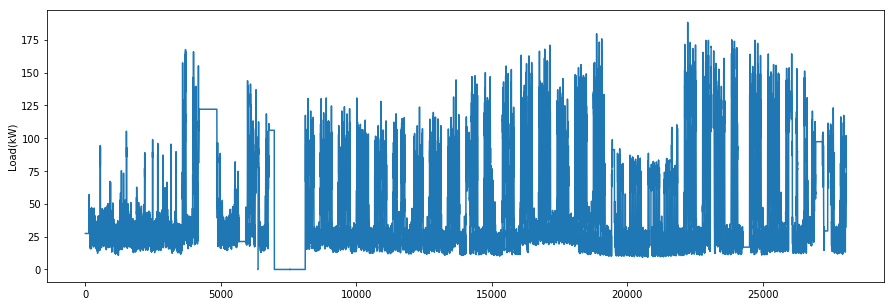

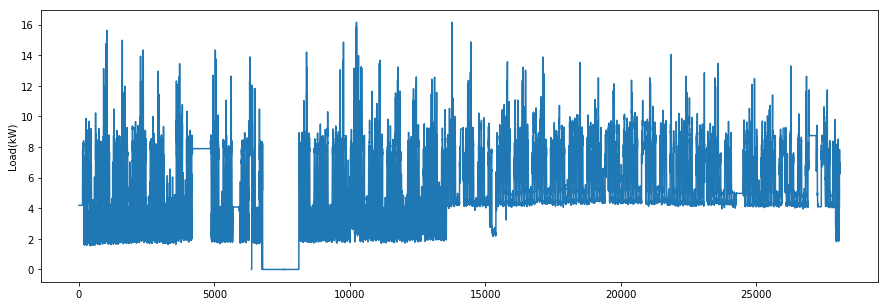

In [85]:
df = pd.read_csv('/Users/xiilab/Downloads/ztec_data_1022.csv')
for i in df.columns[1:]:
    
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.ylabel('Load(kW)')

    plt.plot(df.loc[:,i])
    # plt.title(name)
    plt.show()    


In [88]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [89]:
my_filter = KalmanFilter(dim_x=2, dim_z=1)

In [90]:
my_filter.x = np.array([[2.],
                [0.]])       # initial state (location and velocity)

my_filter.F = np.array([[1.,1.],
                [0.,1.]])    # state transition matrix

my_filter.H = np.array([[1.,0.]])    # Measurement function
my_filter.P *= 1000.                 # covariance matrix
my_filter.R = 5                      # state uncertainty
my_filter.Q = Q_discrete_white_noise(2, dt, .1) # process uncertainty

NameError: name 'dt' is not defined

In [96]:
a = {'a':[1,2],'b':[3,4]}
b = {'c':[5,6]}
c = dict(a,**b)
c

{'a': [1, 2], 'b': [3, 4], 'c': [5, 6]}

In [2]:
from datetime import datetime, timedelta 

hm = datetime(2019,10,1,0,0)

In [12]:
now = datetime.now()
now

datetime.datetime(2019, 10, 29, 16, 47, 16, 32931)

In [13]:
now-hm

datetime.timedelta(days=28, seconds=60436, microseconds=32931)

In [15]:
hm = datetime(2019,9,1,0,0)
a = now-hm

In [19]:
a

datetime.timedelta(days=58, seconds=60436, microseconds=32931)

In [47]:
hmlist = [hm+timedelta(minutes=15*i) for i in range(5635)]

In [48]:
hmlist[-1]

datetime.datetime(2019, 10, 29, 16, 30)

In [43]:
58*24*4

5568

In [45]:
60436/60/15

67.1511111111111

In [46]:
5568+67

5635

In [102]:
hmm = datetime(2019,8,30,0,0)
hmm2 = datetime(2019,9,1,23,45)

hmm2 - hmm

datetime.timedelta(days=2, seconds=85500)

In [104]:
hmm + timedelta(minutes=4305)

datetime.datetime(2019, 9, 1, 23, 45)

In [107]:
4305/15

287.0

In [141]:
dt2 = datetime(2019,10,31,9,45)
dt1 = datetime(2019,10,31,0,0)
dt2 - dt1

datetime.timedelta(seconds=35100)

In [142]:
35100/(60*15)

39.0

In [153]:
from datetime import datetime, timedelta 
import pandas as pd
import numpy as np 
import pymssql 



def mssql_update(Eng_ItCode):
    conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
    cur = conn.cursor()
    
    ###
#     hmm = datetime(2019,8,30,0,0)
    hmm = datetime(2019,2,13,0,0)
    hmlist = [hmm+timedelta(minutes=15*i) for i in range(24864)]
    ###
    
    for hm in hmlist:
        dt_li = tuple(hm - timedelta(days=7*i) for i in range(7))
        hm_li = tuple(datetime.strftime(dt, '%Y-%m-%d 00:00:00') for dt in dt_li)
        print(hm_li)
        hhmm = str(hm.hour).zfill(2) + str(hm.minute).zfill(2)
        print(hhmm)
        query = "SELECT Eng_RDate, [%s] FROM [ZTEC_Center_Jincheon].[dbo].[EnergyWorkResult_2019]" %(hhmm)
#         query = "SELECT Eng_RDate, [%s] FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data]" %(hhmm)
        query += " WHERE Eng_RDate in %s and Kind_Code=001001001 and Eng_ItCode=%s order by Eng_RDate desc" %(hm_li, Eng_ItCode)
        cur.execute(query)
        mydict = {'datetime':[], hhmm:[]}
        for row in cur:
            mydict['datetime'].append(row[0])
            if row[1] is not None:
                mydict[hhmm].append(float(row[1]))
            else:
                mydict[hhmm].append(np.nan)

        mdf = pd.DataFrame(mydict)
        # conn.close()
        print(mdf)
        # print(mdf[hhmm])
        med = np.nanmedian(mdf[hhmm])

        maxval = med*1.3
        minval = med*0.7

        mdf[hhmm] = mdf[hhmm].where(mdf[hhmm].between(minval, maxval))
        mdf[hhmm] = pd.to_numeric(mdf[hhmm], errors='coerce')
        mdf[hhmm] = mdf[hhmm].fillna(med)
#         print(mdf)

        dt = mdf.iloc[0,0]
        val = mdf.iloc[0,1]
        print(dt)
        query2 = "UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [%s]=%f" %(hhmm, val)
        query2 += " WHERE Eng_RDate='%s' and Eng_ItCode=%s"%(dt, Eng_ItCode)
        print(query2)
        cur.execute(query2)
        conn.commit()
    conn.close()
    

### 신재생 에너지 테이블 전처리 

In [158]:
conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
cur = conn.cursor()

hmm = datetime(2019,2,13,0,0)
hmlist = [hmm+timedelta(days=i) for i in range(259)]

for hm in hmlist:
    hmm = datetime.strftime(hm, '%Y-%m-%d %H:%M:%S')
    query2 = "INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate)"
    query2 += " VALUES ('001001001','1','%s')"%(hmm)
    print(query2)
    cur.execute(query2)
    conn.commit()
conn.close()

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-13 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-14 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-15 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-16 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-17 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-18 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-02-19 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-17 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-18 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-19 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-20 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-21 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-22 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-04-23 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-19 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-20 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-21 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-22 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-23 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-24 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-06-25 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-21 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-22 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-23 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-24 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-25 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-26 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-08-27 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-23 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-24 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-25 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-26 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-27 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-28 00:00:00')
INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] (Kind_Code, Eng_ItCode, Eng_RDate) VALUES ('001001001','1','2019-10-29 00:00:00')


In [162]:
hmm = datetime(2019,10,30,0,0)
hm2 = datetime(2019,10,31,14, 15)
hm2 - hmm

datetime.timedelta(days=1, seconds=51300)

In [164]:
855/15

57.0

In [171]:
from datetime import datetime, timedelta 
import pandas as pd
import numpy as np 
import pymssql 



def mssql_update2(Eng_ItCode):
    conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
    cur = conn.cursor()
    
    ###
    hmm = datetime(2019,8,30,0,0)
#     hmm = datetime(2019,8,30,14,15)
    hmlist = [hmm+timedelta(minutes=15*i) for i in range(289)]
    ###
    
    for hm in hmlist:
        dt_li = tuple(hm - timedelta(days=7*i) for i in range(7))
        hm_li = tuple(datetime.strftime(dt, '%Y-%m-%d 00:00:00') for dt in dt_li)
        print(hm_li)
        hhmm = str(hm.hour).zfill(2) + str(hm.minute).zfill(2)
        print(hhmm)
#         query = "SELECT Eng_RDate, [%s] FROM [ZTEC_Center_Jincheon].[dbo].[EnergyWorkResult_2019]" %(hhmm)
        query = "SELECT Eng_RDate, [%s] FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data]" %(hhmm)
        query += " WHERE Eng_RDate in %s and Kind_Code=001001001 and Eng_ItCode=%s order by Eng_RDate desc" %(hm_li, Eng_ItCode)
        cur.execute(query)
        mydict = {'datetime':[], hhmm:[]}
        for row in cur:
            mydict['datetime'].append(row[0])
            if row[1] is not None:
                mydict[hhmm].append(float(row[1]))
            else:
                mydict[hhmm].append(np.nan)

        mdf = pd.DataFrame(mydict)
        # conn.close()
        print(mdf)
        # print(mdf[hhmm])
        med = np.nanmedian(mdf[hhmm])

        maxval = med*1.3
        minval = med*0.7

        mdf[hhmm] = mdf[hhmm].where(mdf[hhmm].between(minval, maxval))
        mdf[hhmm] = pd.to_numeric(mdf[hhmm], errors='coerce')
        mdf[hhmm] = mdf[hhmm].fillna(med)
#         print(mdf)

        dt = mdf.iloc[0,0]
        val = mdf.iloc[0,1]
        print(dt)
        query2 = "UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [%s]=%f" %(hhmm, val)
        query2 += " WHERE Eng_RDate='%s' and Eng_ItCode=%s"%(dt, Eng_ItCode)
        print(query2)
        cur.execute(query2)
        conn.commit()
    conn.close()
    

In [172]:
# for i in ['3','5','7','9','11', '13','15']:
#     mssql_update(i)
mssql_update2('1')

('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
0000
    datetime  0000
0 2019-08-30   NaN
1 2019-08-23   0.0
2 2019-08-16   0.0
3 2019-08-09   0.0
4 2019-08-02   0.0
5 2019-07-26   0.0
6 2019-07-19   0.0
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=0.000000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
0015
    datetime  0015
0 2019-08-30   NaN
1 2019-08-23   0.0
2 2019-08-16   0.0
3 2019-08-09   0.0
4 2019-08-02   0.0
5 2019-07-26   0.0
6 2019-07-19   0.0
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=0.000000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2

('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
0500
    datetime  0500
0 2019-08-30   NaN
1 2019-08-23   0.0
2 2019-08-16   0.0
3 2019-08-09   0.0
4 2019-08-02   0.0
5 2019-07-26   0.0
6 2019-07-19   0.0
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=0.000000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
0515
    datetime   0515
0 2019-08-30    NaN
1 2019-08-23  0.000
2 2019-08-16  0.227
3 2019-08-09  0.520
4 2019-08-02  0.587
5 2019-07-26  3.020
6 2019-07-19  3.020
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=0.553500 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00

2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=284.080000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
1015
    datetime     1015
0 2019-08-30      NaN
1 2019-08-23  253.994
2 2019-08-16  145.800
3 2019-08-09  201.800
4 2019-08-02  306.187
5 2019-07-26  246.253
6 2019-07-19  246.253
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=246.253000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
1030
    datetime     1030
0 2019-08-30      NaN
1 2019-08-23  281.693
2 2019-08-16  349.053
3 2019-08-09  297.093
4 2019-08-02  399.253
5 2019-07-26  305.053
6 2019-07-19  349.053
2019-08-30 00:00:00


('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
1515
    datetime     1515
0 2019-08-30      NaN
1 2019-08-23  145.350
2 2019-08-16  122.753
3 2019-08-09  122.753
4 2019-08-02  121.473
5 2019-07-26   92.887
6 2019-07-19  158.633
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=122.753000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
1530
    datetime     1530
0 2019-08-30      NaN
1 2019-08-23  304.133
2 2019-08-16  187.447
3 2019-08-09  187.447
4 2019-08-02  187.447
5 2019-07-26  187.447
6 2019-07-19  187.447
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=187.447000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:0

('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
2030
    datetime  2030
0 2019-08-30   NaN
1 2019-08-23   0.0
2 2019-08-16   0.0
3 2019-08-09   0.0
4 2019-08-02   0.0
5 2019-07-26   0.0
6 2019-07-19   0.0
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=0.000000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2019-08-09 00:00:00', '2019-08-02 00:00:00', '2019-07-26 00:00:00', '2019-07-19 00:00:00')
2045
    datetime  2045
0 2019-08-30   NaN
1 2019-08-23   0.0
2 2019-08-16   0.0
3 2019-08-09   0.0
4 2019-08-02   0.0
5 2019-07-26   0.0
6 2019-07-19   0.0
2019-08-30 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=0.000000 WHERE Eng_RDate='2019-08-30 00:00:00' and Eng_ItCode=1
('2019-08-30 00:00:00', '2019-08-23 00:00:00', '2019-08-16 00:00:00', '2

('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
0130
    datetime  0130
0 2019-08-31   NaN
1 2019-08-24   0.0
2 2019-08-17   0.0
3 2019-08-10   0.0
4 2019-08-03   0.0
5 2019-07-27   0.0
6 2019-07-20   0.0
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=0.000000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
0145
    datetime  0145
0 2019-08-31   NaN
1 2019-08-24   0.0
2 2019-08-17   0.0
3 2019-08-10   0.0
4 2019-08-03   0.0
5 2019-07-27   0.0
6 2019-07-20   0.0
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=0.000000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2

('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
0615
    datetime    0615
0 2019-08-31     NaN
1 2019-08-24  21.340
2 2019-08-17  27.193
3 2019-08-10  27.193
4 2019-08-03  35.153
5 2019-07-27  28.373
6 2019-07-20  43.240
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=27.783000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
0630
    datetime    0630
0 2019-08-31     NaN
1 2019-08-24  34.490
2 2019-08-17  29.760
3 2019-08-10  44.847
4 2019-08-03  39.220
5 2019-07-27  39.220
6 2019-07-20  60.673
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=39.220000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00

    datetime     1115
0 2019-08-31      NaN
1 2019-08-24  334.647
2 2019-08-17  417.420
3 2019-08-10  377.480
4 2019-08-03  317.847
5 2019-07-27  351.447
6 2019-07-20  258.147
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=343.047000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
1130
    datetime     1130
0 2019-08-31      NaN
1 2019-08-24  331.877
2 2019-08-17  284.153
3 2019-08-10  410.067
4 2019-08-03  474.153
5 2019-07-27  379.600
6 2019-07-20  463.180
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=394.833500 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
1145
    datetime     114

('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
1630
    datetime     1630
0 2019-08-31      NaN
1 2019-08-24  135.820
2 2019-08-17  155.393
3 2019-08-10  143.767
4 2019-08-03  143.767
5 2019-07-27  143.767
6 2019-07-20  177.027
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=143.767000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
1645
    datetime     1645
0 2019-08-31      NaN
1 2019-08-24   80.727
2 2019-08-17  143.640
3 2019-08-10  143.640
4 2019-08-03  143.640
5 2019-07-27  148.960
6 2019-07-20  148.960
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=143.640000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:0

('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
2130
    datetime  2130
0 2019-08-31   NaN
1 2019-08-24   0.0
2 2019-08-17   0.0
3 2019-08-10   0.0
4 2019-08-03   0.0
5 2019-07-27   0.0
6 2019-07-20   0.0
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=0.000000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2019-08-10 00:00:00', '2019-08-03 00:00:00', '2019-07-27 00:00:00', '2019-07-20 00:00:00')
2145
    datetime  2145
0 2019-08-31   NaN
1 2019-08-24   0.0
2 2019-08-17   0.0
3 2019-08-10   0.0
4 2019-08-03   0.0
5 2019-07-27   0.0
6 2019-07-20   0.0
2019-08-31 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=0.000000 WHERE Eng_RDate='2019-08-31 00:00:00' and Eng_ItCode=1
('2019-08-31 00:00:00', '2019-08-24 00:00:00', '2019-08-17 00:00:00', '2

('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
0245
    datetime  0245
0 2019-09-01   NaN
1 2019-08-25   0.0
2 2019-08-18   0.0
3 2019-08-11   0.0
4 2019-08-04   0.0
5 2019-07-28   0.0
6 2019-07-21   0.0
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=0.000000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
0300
    datetime  0300
0 2019-09-01   NaN
1 2019-08-25   0.0
2 2019-08-18   0.0
3 2019-08-11   0.0
4 2019-08-04   0.0
5 2019-07-28   0.0
6 2019-07-21   0.0
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=0.000000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2

('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
0745
    datetime     0745
0 2019-09-01      NaN
1 2019-08-25  148.393
2 2019-08-18  130.927
3 2019-08-11  130.927
4 2019-08-04  126.140
5 2019-07-28  130.927
6 2019-07-21  174.267
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=130.927000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
0800
    datetime     0800
0 2019-09-01      NaN
1 2019-08-25  179.320
2 2019-08-18  156.627
3 2019-08-11  156.627
4 2019-08-04  173.553
5 2019-07-28  134.973
6 2019-07-21  166.760
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=161.693500 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:0

('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
1300
    datetime     1300
0 2019-09-01      NaN
1 2019-08-25  502.213
2 2019-08-18  418.587
3 2019-08-11  420.933
4 2019-08-04  400.440
5 2019-07-28  325.467
6 2019-07-21  444.053
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=419.760000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
1315
    datetime     1315
0 2019-09-01      NaN
1 2019-08-25  374.943
2 2019-08-18  470.373
3 2019-08-11  279.513
4 2019-08-04  478.087
5 2019-07-28  451.867
6 2019-07-21  451.867
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=451.867000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:0

('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
1815
    datetime    1815
0 2019-09-01     NaN
1 2019-08-25  47.680
2 2019-08-18  40.667
3 2019-08-11  37.127
4 2019-08-04  40.667
5 2019-07-28  40.667
6 2019-07-21  31.447
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=40.667000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
1830
    datetime    1830
0 2019-09-01     NaN
1 2019-08-25  35.120
2 2019-08-18  39.613
3 2019-08-11  33.607
4 2019-08-04  43.727
5 2019-07-28  48.180
6 2019-07-21  52.733
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=41.670000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00

    datetime  2315
0 2019-09-01   NaN
1 2019-08-25   0.0
2 2019-08-18   0.0
3 2019-08-11   0.0
4 2019-08-04   0.0
5 2019-07-28   0.0
6 2019-07-21   0.0
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=0.000000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
2330
    datetime  2330
0 2019-09-01   NaN
1 2019-08-25   0.0
2 2019-08-18   0.0
3 2019-08-11   0.0
4 2019-08-04   0.0
5 2019-07-28   0.0
6 2019-07-21   0.0
2019-09-01 00:00:00
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=0.000000 WHERE Eng_RDate='2019-09-01 00:00:00' and Eng_ItCode=1
('2019-09-01 00:00:00', '2019-08-25 00:00:00', '2019-08-18 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00', '2019-07-28 00:00:00', '2019-07-21 00:00:00')
2345
    datetime  2345
0 2019-09-01   NaN
1 2019-08-25   0.0
2 2019-08-18   

In [152]:
hmm = datetime(2019,2,13,0,0)
hm2 = datetime(2019,10,30,0,0)
# hm2 - hmm
# n = 259*24*4
# n
hmlist = [hmm+timedelta(minutes=15*i) for i in range(24864)]
hmlist[-1]

datetime.datetime(2019, 10, 29, 23, 45)

In [63]:
mssql_update('3')

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=40.412000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=75.950000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=66.664000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=70.335000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=61.393000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=62.436000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=63.337000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=49.416000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=52.267000 WHERE Eng_RDate='2019-01-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=94.545000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=96.409000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=89.862000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=92.859000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=102.010000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=99.722000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=91.278000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=88.223000 WHERE Eng_RDate='2019-01-03 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=43.493000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=41.918000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=28.531000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=41.377000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=33.091000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=32.746000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=29.509000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=40.927000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=46.955000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=49.797000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=49.046000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=48.893000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=53.518000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=61.099000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=44.206000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=44.665000 WHERE Eng_RDate='2019-01-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=60.581000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=58.021000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=55.873000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=57.359000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=58.996000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=57.081000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=67.211000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=63.842000 WHERE Eng_RDate='2019-01-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=36.218000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=51.502000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=51.981000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=35.107000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=32.387000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=38.630000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=35.630000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=31.405000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.883000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=38.115000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=37.253000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=35.613000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=38.908000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=42.588000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=27.965000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=38.053000 WHERE Eng_RDate='2019-01-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=77.210000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=84.225000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=75.504000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=75.593000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=77.277000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=85.052000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=74.004000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=77.486000 WHERE Eng_RDate='2019-01-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=33.465000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=39.623000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=48.400000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=59.230000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=51.969000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=50.619000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=53.984000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=57.038000 WHERE Eng_RDate='2019-01-08 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=30.721000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=41.609000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=44.659000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=34.776000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=31.742000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=37.034000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=38.247000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=47.358000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=70.201000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=73.296000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=54.264000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=57.183000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=55.143000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=54.748000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=53.120000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=56.519000 WHERE Eng_RDate='2019-01-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=133.960000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=124.786000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=124.308000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=124.768000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=133.663000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=109.648000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=89.691000 WHERE Eng_RDate='2019-01-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=89.097000 WHERE Eng_RDate='2019-01-10 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=28.826000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=35.007000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=46.099000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=47.316000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=47.892000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=39.106000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=28.824000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=33.577000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=47.936000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=46.341000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=61.282000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.235000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=36.642000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=28.302000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=35.619000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=35.219000 WHERE Eng_RDate='2019-01-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=57.165000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=44.534000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=47.415000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=45.677000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=49.486000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=66.264000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=62.499000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=49.639000 WHERE Eng_RDate='2019-01-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=40.349000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=32.496000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=31.682000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=33.973000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=41.443000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=39.240000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=78.818000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=79.472000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=31.227000 WHERE Eng_RDate='2019-01-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=38.373000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=32.053000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=26.867000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=44.248000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=38.440000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=37.698000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=34.840000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=70.174000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=85.195000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=80.801000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=58.104000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=51.224000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=47.184000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=46.557000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=49.804000 WHERE Eng_RDate='2019-01-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=73.331000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=76.095000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=74.189000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=66.838000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=77.242000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=76.940000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=78.372000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=67.000000 WHERE Eng_RDate='2019-01-15 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=36.131000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=39.678000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=40.412000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=40.412000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=42.276000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=43.795000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=39.789000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=33.634000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=87.722000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.559000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=42.569000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=41.809000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=39.350000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=39.199000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=49.713000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=36.330000 WHERE Eng_RDate='2019-01-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=85.883000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=98.553000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=88.524000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=88.535000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=87.287000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=81.725000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=77.896000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=90.021000 WHERE Eng_RDate='2019-01-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=41.550000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=35.573000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=36.126000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=44.261000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=35.832000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=33.200000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=50.715000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=55.399000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=28.781000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=32.296000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=27.235000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=27.136000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=29.171000 WHERE Eng_RDate='2019-01-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=34.502000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=39.112000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=32.743000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=58.946000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=68.974000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=63.169000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=57.282000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=57.419000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=51.563000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=49.926000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=61.436000 WHERE Eng_RDate='2019-01-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=52.035000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=61.651000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=68.294000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=64.715000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=67.720000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=65.565000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=61.805000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=66.917000 WHERE Eng_RDate='2019-01-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=47.900000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=41.027000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=30.351000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=39.682000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=37.033000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=30.783000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=28.776000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=47.628000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=49.791000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=52.251000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=51.754000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=50.157000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=59.587000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=62.533000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=47.798000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=43.997000 WHERE Eng_RDate='2019-01-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=71.685000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=59.004000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=57.738000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=57.224000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=72.079000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=73.989000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=70.038000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=68.878000 WHERE Eng_RDate='2019-01-22 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=33.915000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=30.722000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=41.344000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=43.545000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=32.162000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=27.286000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=43.233000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=38.191000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=88.850000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=61.806000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=43.912000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=41.984000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=38.988000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=36.694000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=32.411000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=30.334000 WHERE Eng_RDate='2019-01-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=76.959000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=67.888000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=76.226000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=83.284000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=71.460000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=80.121000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=71.169000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=69.214000 WHERE Eng_RDate='2019-01-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=33.681000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=42.056000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=40.221000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=39.233000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=43.750000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=45.740000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=76.821000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=112.190000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=31.364000 WHERE Eng_RDate='2019-01-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=35.291000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=40.484000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=40.599000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=30.480000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=40.017000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=31.755000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=29.388000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=64.201000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=61.287000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=54.159000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=48.597000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=44.329000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=44.757000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=56.013000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=52.279000 WHERE Eng_RDate='2019-01-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=79.988000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=81.623000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=66.476000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=65.562000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=55.461000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=57.563000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=53.544000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=56.562000 WHERE Eng_RDate='2019-01-27 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=27.708000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=38.516000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=43.174000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=26.079000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=28.032000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=40.135000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=30.834000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=29.222000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=63.172000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=39.914000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=37.439000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=38.110000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=30.701000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=27.438000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=27.872000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=37.204000 WHERE Eng_RDate='2019-01-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=58.285000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=60.318000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=73.658000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=57.712000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=54.673000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=59.042000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=60.618000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=58.247000 WHERE Eng_RDate='2019-01-29 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=36.861000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=42.260000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=45.862000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=58.638000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=59.163000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=69.566000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=85.816000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=89.308000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=45.086000 WHERE Eng_RDate='2019-01-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=52.036000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=49.330000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=42.000000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.657000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=36.682000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=36.682000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=36.682000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=79.164000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=93.774000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=94.459000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=67.410000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=69.073000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=96.889000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=74.354000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=73.622000 WHERE Eng_RDate='2019-01-31 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=131.314000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=106.333000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=133.280000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=124.510000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=115.801000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=114.532000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=111.031000 WHERE Eng_RDate='2019-02-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=107.440000 WHERE Eng_RDate='2019-02-01 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=32.311000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=34.100000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=39.159000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=37.435000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=46.681000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=39.166000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=38.758000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=35.890000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=47.774000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=54.283000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=50.018000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=45.091000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=56.082000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=54.231000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=57.294000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=43.125000 WHERE Eng_RDate='2019-02-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=59.373000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=72.309000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=67.584000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=51.689000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=56.329000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=56.432000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=56.938000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=69.028000 WHERE Eng_RDate='2019-02-03 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=49.607000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=34.741000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=30.730000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=36.647000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=49.111000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=49.229000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=45.788000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=42.918000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=36.604000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=35.110000 WHERE Eng_RDate='2019-02-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=39.030500 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=42.464000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=42.828000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=30.762000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=42.968000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=37.390000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=60.494000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=62.396000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=42.173000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=56.105500 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=58.756000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=61.236000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=53.144000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=39.601000 WHERE Eng_RDate='2019-02-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=97.336000 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=99.998000 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=100.634500 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=99.595500 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=102.685000 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=104.636500 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=110.027000 WHERE Eng_RDate='2019-02-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=101.929000 WHERE Eng_RDate='2019-02-06 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=40.410000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=38.442000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=31.504000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=37.298000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=43.163000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=38.695500 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=41.719000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=33.153000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=54.970000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=54.475500 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=55.627500 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=55.541500 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=63.783000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=57.755000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=55.016000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=52.811000 WHERE Eng_RDate='2019-02-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=101.959000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=98.578000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=97.546500 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=83.882000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=84.292000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=88.589000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=86.188000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=84.059000 WHERE Eng_RDate='2019-02-08 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=39.962000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=49.585000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=41.230000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=39.791000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=41.950000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=60.316000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=44.791000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=35.167000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=49.403000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=44.390000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=58.066000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=40.326000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=41.553000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=37.601000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=39.651000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=45.295000 WHERE Eng_RDate='2019-02-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=54.626000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=60.529000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=57.271000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=52.584000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=51.477000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=54.489000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=57.290000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=61.069000 WHERE Eng_RDate='2019-02-10 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=70.726000 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=104.425500 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=103.960500 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=101.792500 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=100.713500 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=99.142500 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=98.249000 WHERE Eng_RDate='2019-02-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=92.928500 WHERE Eng_RDate='2019-02-11 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=40.412000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=47.805000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=38.131000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=45.659000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=43.060000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.873000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=41.656000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=41.488000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=45.279000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=47.417000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=43.085000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=46.265000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=46.035000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=43.785000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=44.276000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=42.237000 WHERE Eng_RDate='2019-02-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=93.575000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=91.518000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=90.362000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=88.193000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=89.450000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=79.147000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=84.355000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=73.624000 WHERE Eng_RDate='2019-02-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=38.928000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=37.717000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=33.153000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=38.198000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=36.898000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=36.682000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=36.682000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=44.502000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=57.008000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=63.994000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=56.006000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=56.128000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=48.314000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.480000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=36.080000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=34.946000 WHERE Eng_RDate='2019-02-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=93.856000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=92.923000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=89.353000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=90.366000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=92.917000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=86.805000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=88.260000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=84.426000 WHERE Eng_RDate='2019-02-15 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=37.495000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=32.786000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=37.525000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=38.254000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=38.704000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=34.947000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=39.349000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=39.053000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=45.295000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=37.162000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=34.196000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=36.184000 WHERE Eng_RDate='2019-02-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=40.967000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=50.224000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=41.171000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.443000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=61.069000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=72.085000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=69.633000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=60.057000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=64.144000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=64.939000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=57.751000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=55.676000 WHERE Eng_RDate='2019-02-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=105.616000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=105.272000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=101.482000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=99.913000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=103.009000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=93.739000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=107.052000 WHERE Eng_RDate='2019-02-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=107.958000 WHERE Eng_RDate='2019-02-18 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=40.458500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=39.407500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=39.271500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=45.644500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=41.736000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.744000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=35.732000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=41.699000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=52.599500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=51.538500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=47.677500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=45.698000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=49.180500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=44.660000 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=50.483500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=48.913500 WHERE Eng_RDate='2019-02-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=91.654500 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=92.840500 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=89.116000 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=89.673000 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=83.967500 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=84.796500 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=82.614000 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=80.736000 WHERE Eng_RDate='2019-02-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=38.480000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=40.893000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=49.250000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=39.494000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=39.962000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=48.703000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=56.700000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=37.945000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=66.015000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=56.395000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=49.904000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=51.634000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.433000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=37.203000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=41.566000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=48.102000 WHERE Eng_RDate='2019-02-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=99.395000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=90.100000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=93.443000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=100.519000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=96.960000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=97.301000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=99.253000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=96.580000 WHERE Eng_RDate='2019-02-22 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=35.901000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=39.485000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=43.390000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=43.443000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=36.876000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=36.793000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=37.718000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=33.325000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=38.204000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=47.854000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=40.037000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=35.619000 WHERE Eng_RDate='2019-02-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=42.384000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=43.528000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=40.218000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=37.074000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=61.757000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=59.440000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=69.800000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=58.852000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=53.387000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=57.344000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=53.730000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=51.325000 WHERE Eng_RDate='2019-02-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=94.236000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=98.639000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=96.171000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=107.131000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=87.805000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=93.837000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=88.692000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=92.108000 WHERE Eng_RDate='2019-02-25 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=29.609000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=34.994000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=43.211000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=47.182000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=35.034000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=37.308000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=39.303000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=34.950000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=64.053000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=47.236000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=54.129000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=54.883000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=51.425000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=53.830000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=55.347000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=61.175000 WHERE Eng_RDate='2019-02-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=83.646000 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=121.965000 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=97.666000 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=96.339000 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=88.821500 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=83.583500 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=87.331500 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=111.949000 WHERE Eng_RDate='2019-02-27 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=44.600000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=49.528000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=40.663000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=36.003000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=38.322000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=39.195000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=45.268000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=63.527000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=40.714000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=38.667000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=49.583000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=50.167000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=37.779000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=39.314000 WHERE Eng_RDate='2019-02-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=42.585000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=50.210000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=90.381500 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=92.136000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=95.171000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=94.591500 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=84.263500 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=82.576000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=81.090000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=78.459000 WHERE Eng_RDate='2019-03-01 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=38.583000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=38.583000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=38.583000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=38.583000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=55.734000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=74.535000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=77.305000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=79.782000 WHERE Eng_RDate='2019-03-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=38.583000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=59.692000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=58.636000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=56.890000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=55.735000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=54.663000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=57.228000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=49.148000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=50.245000 WHERE Eng_RDate='2019-03-03 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=119.861000 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=103.464500 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=99.471000 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=127.224000 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=125.337000 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=86.525500 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=92.375000 WHERE Eng_RDate='2019-03-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=91.335000 WHERE Eng_RDate='2019-03-04 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=36.392000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=31.756000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=36.575000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=42.442000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=53.033000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=41.229500 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=53.825000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=43.056500 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.167000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=42.310500 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=48.298000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=43.443000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=41.702000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=47.262000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=40.662000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=39.406000 WHERE Eng_RDate='2019-03-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=91.365000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=92.374500 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=81.195000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=112.794000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=76.488000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=81.463000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=73.816500 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=72.843000 WHERE Eng_RDate='2019-03-06 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=135.911000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=124.372000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=135.814000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=119.342000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=120.223000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=113.891000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=117.599000 WHERE Eng_RDate='2019-03-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=113.780000 WHERE Eng_RDate='2019-03-07 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=38.583000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=38.581000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=38.583000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=51.437000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=48.118000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=37.162000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=38.583000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=38.583000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=79.980000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=56.771500 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=55.229500 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=60.996000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=66.313000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=63.863000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=58.050500 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=54.645000 WHERE Eng_RDate='2019-03-08 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=61.444000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=57.741000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=61.055000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=63.496000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=70.901000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=60.391000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=60.170000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=63.683000 WHERE Eng_RDate='2019-03-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=35.621000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=29.692000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=32.268000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=30.897000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=29.553000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=35.381000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=45.445000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=45.519000 WHERE Eng_RDate='2019-03-10 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=42.688000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=38.309000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=33.864000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=36.616000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=47.279500 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=33.633000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=34.733000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=41.602000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=90.420000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=92.983000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=88.453000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=93.573000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=105.612000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=124.621000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=123.692000 WHERE Eng_RDate='2019-03-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=141.302000 WHERE Eng_RDate='2019-03-11 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=100.390000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=77.847000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=77.847000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=113.315000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=115.311000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=119.258000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=124.827000 WHERE Eng_RDate='2019-03-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=118.779000 WHERE Eng_RDate='2019-03-12 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=39.693500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=52.337000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=48.504000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=40.341500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=42.533000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=44.764500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=48.163000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=44.042000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=61.354500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=53.873000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=50.030500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=47.124500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=43.773000 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=42.424500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=41.641500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=39.325500 WHERE Eng_RDate='2019-03-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=128.360000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=127.568000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=127.742000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=128.206000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=127.947000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=128.043000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=128.159000 WHERE Eng_RDate='2019-03-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=97.872000 WHERE Eng_RDate='2019-03-14 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=38.583000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=40.470000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=44.931000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=63.864000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=60.949000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=53.297000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=81.010000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=112.190000 WHERE Eng_RDate='2019-03-15 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=42.994000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=42.469000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=38.123000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=41.582500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=39.946000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=38.990000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=39.130000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=42.903000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=51.152000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=46.862500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=50.212500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=51.194000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=48.160500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=47.154000 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=47.154500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=50.298500 WHERE Eng_RDate='2019-03-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=56.753500 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=58.890000 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=54.962500 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=63.436500 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=60.546000 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=55.694500 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=51.069500 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=52.575000 WHERE Eng_RDate='2019-03-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=46.042000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=41.598500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=39.650500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=41.824500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=36.587000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=39.251000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=44.498000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=50.893500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=76.342000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=63.608500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=55.224000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=46.455000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=38.657000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=34.181000 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=32.774500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=37.168500 WHERE Eng_RDate='2019-03-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=110.918500 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=103.633000 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=106.071500 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=106.770500 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=100.070500 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=97.790500 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=96.685000 WHERE Eng_RDate='2019-03-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=97.189500 WHERE Eng_RDate='2019-03-19 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=56.007500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=55.107500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=57.895500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=47.142000 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=53.201500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=71.007000 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=82.880500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=75.105000 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=36.159000 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=34.322500 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=36.299000 WHERE Eng_RDate='2019-03-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=46.992000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=48.208000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=45.566500 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=35.007500 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=38.733000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=109.143500 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=99.750000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=98.026000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=94.712000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=96.419000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=96.613500 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=98.038000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=83.809000 WHERE Eng_RDate='2019-03-21 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=68.805000 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=68.418500 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=69.207500 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=68.234000 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=84.114000 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=115.924000 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=109.142500 WHERE Eng_RDate='2019-03-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=108.750500 WHERE Eng_RDate='2019-03-22 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=38.911000 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=38.763500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=39.130000 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=42.685500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=41.846500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=36.145500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=38.995500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=38.871000 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=47.550500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=49.198000 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=46.756500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=46.231500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=45.801500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=48.391000 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=47.953500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=52.265500 WHERE Eng_RDate='2019-03-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=60.743000 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=56.753500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=57.063500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=54.962500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=55.902500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=54.330500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=53.731000 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=51.069500 WHERE Eng_RDate='2019-03-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=39.650500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=41.150000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=36.587000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=39.251000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=44.498000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=50.893500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=53.433500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=48.349500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=63.608500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=55.224000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=46.455000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=38.657000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=34.181000 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=32.774500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=36.798500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=36.842500 WHERE Eng_RDate='2019-03-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=137.615000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=145.855000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=137.010000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=124.072000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=102.441000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=110.398000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=104.450000 WHERE Eng_RDate='2019-03-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=99.393000 WHERE Eng_RDate='2019-03-26 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=54.036000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=55.358000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=69.825000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=85.219000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=78.285000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=109.998000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=127.792000 WHERE Eng_RDate='2019-03-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=122.352000 WHERE Eng_RDate='2019-03-27 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=43.891000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=32.786000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=29.680000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=30.640000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=39.084000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=33.482000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=28.314000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=42.313000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=143.635000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=142.314000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=132.506000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=115.109000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=114.205000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=93.879000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=69.708000 WHERE Eng_RDate='2019-03-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=69.099000 WHERE Eng_RDate='2019-03-28 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=68.418500 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=69.207500 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=68.234000 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=84.114000 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=137.631000 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=144.294000 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=145.672000 WHERE Eng_RDate='2019-03-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=148.376000 WHERE Eng_RDate='2019-03-29 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.208000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=31.314000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=30.899000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=26.666000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=25.899000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=30.879000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=35.945000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=42.789000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=37.812000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=35.952000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=39.879000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=39.436000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=41.341000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=37.326000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=36.638000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=33.421000 WHERE Eng_RDate='2019-03-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=49.943000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=52.140000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=51.110000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=66.070000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=45.390000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=49.973000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=48.357000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=46.781000 WHERE Eng_RDate='2019-03-31 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=61.010000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=56.299000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=64.461000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=87.381000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=105.644000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=106.985000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=122.875000 WHERE Eng_RDate='2019-04-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=155.553000 WHERE Eng_RDate='2019-04-01 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=38.884000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=38.707000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=48.212000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=35.948000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=36.517000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=32.382000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=32.463000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=36.817000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=132.009000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=114.483000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=113.205000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=115.024000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=111.948000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=102.963000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=102.581000 WHERE Eng_RDate='2019-04-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=109.717000 WHERE Eng_RDate='2019-04-02 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=131.610000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=132.994000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=151.287000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=150.889000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=146.961000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=168.037000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=168.710000 WHERE Eng_RDate='2019-04-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=130.745500 WHERE Eng_RDate='2019-04-03 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=29.434000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=30.105000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=49.971000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=47.952000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=31.859000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=32.051000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=37.884000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=34.112000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=81.520000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=110.173000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=118.575000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=127.217000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=98.825000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=96.414000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=93.852000 WHERE Eng_RDate='2019-04-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=100.621000 WHERE Eng_RDate='2019-04-04 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=124.190000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=126.033000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=122.157000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=126.036000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=126.132000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=131.261000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=131.158000 WHERE Eng_RDate='2019-04-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=130.698000 WHERE Eng_RDate='2019-04-05 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=34.024000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=39.343000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=40.670000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=36.965000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=31.340000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=39.856500 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=27.308000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=42.312000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=29.137000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=44.166000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=33.219000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=39.310000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=31.466000 WHERE Eng_RDate='2019-04-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=35.427000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=41.178000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=37.172000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=63.931000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=56.191000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=47.510000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=46.724000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=45.873000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=45.172000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=46.923000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=46.314000 WHERE Eng_RDate='2019-04-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=123.592000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=140.823000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=136.916000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=150.500000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=165.330000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=151.177000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=141.619000 WHERE Eng_RDate='2019-04-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=149.652000 WHERE Eng_RDate='2019-04-08 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=34.348000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=28.697000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=32.722000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=41.235000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=27.513000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=28.586000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=29.484000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=26.472000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=80.020000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=86.245000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=85.725000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=69.910000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=58.546000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=63.096000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=53.939000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.244000 WHERE Eng_RDate='2019-04-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=141.216000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=147.539000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=148.026000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=133.572500 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=171.952000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=174.519000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=151.548000 WHERE Eng_RDate='2019-04-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=132.681000 WHERE Eng_RDate='2019-04-10 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=60.581000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=51.745000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=63.221000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=61.033000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=81.896000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=101.367000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=115.487000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=128.148000 WHERE Eng_RDate='2019-04-11 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=33.527000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=35.312000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=31.476000 WHERE Eng_RDate='2019-04-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=37.937000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=34.138000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=40.569000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.312000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=33.145000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=125.703000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=138.866000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=134.796000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=98.357000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=125.712000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=105.538000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=88.353000 WHERE Eng_RDate='2019-04-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=96.746000 WHERE Eng_RDate='2019-04-12 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=54.161000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=52.686000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=52.009000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=52.920000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=50.111000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=55.305000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=57.728000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=56.842000 WHERE Eng_RDate='2019-04-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.864000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=28.883000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=30.421000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=26.214000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=27.310000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=28.507000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=36.731000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=36.338000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=43.608000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=42.714000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=49.851000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=58.286000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=41.338000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=39.654000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=40.582000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=40.647000 WHERE Eng_RDate='2019-04-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=140.962000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=144.956000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=137.371000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=125.384000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=127.284000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=127.750000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=135.743000 WHERE Eng_RDate='2019-04-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=136.745000 WHERE Eng_RDate='2019-04-15 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=32.732000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=29.041000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=31.019000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=38.011000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=47.479000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=32.530000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=30.513000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=37.500000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=73.625000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=70.691000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=74.721000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=67.683000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=49.475000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=42.376000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=38.430000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=33.658000 WHERE Eng_RDate='2019-04-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=143.341000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=146.351000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=131.223000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=140.818000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=153.289000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=154.781000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=165.224000 WHERE Eng_RDate='2019-04-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=152.466000 WHERE Eng_RDate='2019-04-17 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=51.677000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=58.455000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=50.865000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=71.473000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=56.930000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=51.238000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=54.013000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=83.262000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=36.171000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=35.644000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=36.318000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=36.723000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=37.120000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=32.972000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=33.468000 WHERE Eng_RDate='2019-04-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=41.540000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=134.261000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=118.113000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=123.849000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=126.491000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=111.786000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=108.772000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=115.735000 WHERE Eng_RDate='2019-04-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=138.851000 WHERE Eng_RDate='2019-04-19 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=25.953000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=24.487000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=24.689000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=40.466000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=33.607000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=36.250000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=54.349000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=53.314000 WHERE Eng_RDate='2019-04-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=41.606000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=36.373000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=31.179000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=29.941000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=26.151000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=26.018000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=30.352000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=37.160000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=42.595000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=37.929000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=38.099000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=42.605000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=55.075000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=45.002000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=39.820000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=41.764000 WHERE Eng_RDate='2019-04-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=128.971000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=114.244000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=129.887000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=124.411000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=142.597000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=119.741000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=106.878000 WHERE Eng_RDate='2019-04-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=107.491000 WHERE Eng_RDate='2019-04-22 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=27.788000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=29.097000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=24.773000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=25.657000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=34.129000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=40.417000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=25.421000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=24.290000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=101.360000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=80.224000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=90.477000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=87.092000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=87.921000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=84.788000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=65.853000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=68.079000 WHERE Eng_RDate='2019-04-23 00:00:00' and Eng_

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=120.920000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=135.006000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=134.096000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=122.860000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=131.534000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=117.053000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=144.142000 WHERE Eng_RDate='2019-04-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=147.726000 WHERE Eng_RDate='2019-04-24 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=44.145000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=39.202000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=32.463000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=39.025000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=55.487000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=52.731000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=62.788000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=51.390000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=68.101000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=68.236000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.422000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=41.187000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=38.927000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=38.993000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=35.011000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=41.785000 WHERE Eng_RDate='2019-04-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=133.798000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=136.350000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=153.081000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=163.928000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=142.788000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=135.426000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=130.737000 WHERE Eng_RDate='2019-04-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=142.719000 WHERE Eng_RDate='2019-04-26 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=26.938000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=26.150000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=30.811000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=36.561000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=26.803000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=27.979000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=32.451000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=26.017000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=27.591000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=26.524000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=27.733000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=26.389000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=26.473000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=39.167000 WHERE Eng_RDate='2019-04-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=28.336000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=23.111000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=46.780000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=51.464000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=50.164000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=45.777000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=52.319000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=50.092000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=48.847000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=61.589000 WHERE Eng_RDate='2019-04-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=124.278000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=116.560000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=111.325000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=120.667000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=123.617000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=123.150000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=109.415000 WHERE Eng_RDate='2019-04-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=124.377000 WHERE Eng_RDate='2019-04-29 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=28.488000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=34.817000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=38.061000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=30.531000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=27.462000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=25.283000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=28.359000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=29.336000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=101.871000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=120.659000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=95.450000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=75.092000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=75.999000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=71.148000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=67.734000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=61.808000 WHERE Eng_RDate='2019-04-30 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=123.643500 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=123.666000 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=129.749000 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=123.173000 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=80.679000 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=117.642500 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=124.281000 WHERE Eng_RDate='2019-05-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=131.698500 WHERE Eng_RDate='2019-05-01 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=24.057000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=24.579000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=28.354000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=28.975000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=30.639000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=46.168000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=32.408000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=32.838500 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=77.504000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=78.815000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=68.656000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=74.500000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=71.893000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=59.783000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=50.361000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=41.722000 WHERE Eng_RDate='2019-05-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=109.073000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=112.983000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=130.723000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=136.229000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=125.963000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=128.687000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=119.120000 WHERE Eng_RDate='2019-05-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=119.605000 WHERE Eng_RDate='2019-05-03 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=25.537000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=30.172000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=27.022000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=22.803000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=23.757000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=23.455000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=39.082000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=27.618000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=29.603000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=27.002500 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=26.473000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=25.897000 WHERE Eng_RDate='2019-05-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=26.208000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=23.969000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=29.177000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=36.007000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=48.661000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=48.270500 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=47.472000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=46.304000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=37.016000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=43.528000 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=47.836500 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=46.723500 WHERE Eng_RDate='2019-05-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=98.222000 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=118.547500 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=118.499500 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=110.786500 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=107.704500 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=118.095000 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=112.620000 WHERE Eng_RDate='2019-05-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=115.865000 WHERE Eng_RDate='2019-05-06 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=26.423000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=26.469000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=29.184000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=32.981000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=34.046000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=28.288000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=23.848000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=26.419500 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=90.219000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=72.484000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=77.336000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=78.424000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=109.754500 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=100.424000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=79.469000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=61.059000 WHERE Eng_RDate='2019-05-07 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=126.911000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=110.771000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=109.699000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=99.119000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=103.173000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=115.545000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=107.610000 WHERE Eng_RDate='2019-05-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=110.532000 WHERE Eng_RDate='2019-05-08 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=35.884000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=34.075000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=25.062000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=25.288000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=28.034000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=40.524000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=26.239000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=32.838500 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=71.742500 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=62.586000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=58.695500 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=51.590000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=32.471000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=27.354000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=31.658000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=26.073000 WHERE Eng_RDate='2019-05-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=112.896000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=116.496000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=124.072000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=122.292000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=142.492000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=143.661000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=142.579000 WHERE Eng_RDate='2019-05-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=117.640000 WHERE Eng_RDate='2019-05-10 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=26.221000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=24.542000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=29.635000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=26.331000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=31.651000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=24.620000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=27.285000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=24.863000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=41.072000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=28.774000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=28.165000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=29.856000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=36.959000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=28.749500 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=39.157000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=25.808000 WHERE Eng_RDate='2019-05-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=53.463000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=37.605000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=37.623000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=38.801000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=36.624000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=35.822000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=48.788000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=43.560000 WHERE Eng_RDate='2019-05-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=110.003000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=107.660000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=95.637000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=129.175000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=130.274000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=129.314000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=152.306000 WHERE Eng_RDate='2019-05-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=161.837000 WHERE Eng_RDate='2019-05-13 00:00:00' an

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=26.182000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=25.521000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=27.386000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=30.488500 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=32.360000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=25.632000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=25.973000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=25.483000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=97.606000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=106.831000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=123.588000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=147.077000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=104.906000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=119.684000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=94.876000 WHERE Eng_RDate='2019-05-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=90.104000 WHERE Eng_RDate='2019-05-14 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=152.520000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=145.626000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=134.575000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=140.165000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=148.157000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=150.752000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=113.160000 WHERE Eng_RDate='2019-05-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=149.044000 WHERE Eng_RDate='2019-05-15 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=34.615000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=32.163000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=29.516000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=33.205000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=29.984000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=32.814000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=42.334000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=31.659000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=94.824000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=87.132000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=76.356000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=76.728000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=75.187000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=86.998000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=63.856000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=66.059000 WHERE Eng_RDate='2019-05-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=137.138000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=143.597000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=136.124000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=132.478000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=151.353000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=157.290000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=148.090000 WHERE Eng_RDate='2019-05-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=129.403000 WHERE Eng_RDate='2019-05-17 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=35.519000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=31.539500 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=32.678000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=31.219000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=29.224000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=30.540000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=31.526000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=27.396500 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=36.799000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=31.626000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=30.840000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=33.961000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=33.229000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=29.975000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=37.824000 WHERE Eng_RDate='2019-05-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=31.972000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=54.211000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=53.292000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=56.339000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=51.571000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=53.050000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=48.178500 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=47.415500 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=52.928000 WHERE Eng_RDate='2019-05-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=134.506000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=131.307000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=138.834000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=131.978000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=144.017000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=134.786000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=136.779000 WHERE Eng_RDate='2019-05-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=149.256000 WHERE Eng_RDate='2019-05-20 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=25.641000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=25.214000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=37.194000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=28.006500 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=24.955000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=24.524000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=24.951000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=24.364000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=120.987000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=101.506000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=91.043000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=77.995000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=83.329000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=70.240000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=65.102000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=67.797000 WHERE Eng_RDate='2019-05-21 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=130.737000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=133.435000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=131.882000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=138.103000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=144.486000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=174.262000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=176.325000 WHERE Eng_RDate='2019-05-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=153.378000 WHERE Eng_RDate='2019-05-22 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=30.942000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=30.007000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=31.430000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=47.790000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=74.316000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=73.356000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=55.732000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=45.316000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=72.435000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=58.695500 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=59.328000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=43.187000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=41.573000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=38.033000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=38.698000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=34.513000 WHERE Eng_RDate='2019-05-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=137.886000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=171.091000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=152.448000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=148.125000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=146.300000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=130.890000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=121.262000 WHERE Eng_RDate='2019-05-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=116.448000 WHERE Eng_RDate='2019-05-24 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=28.651000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=28.453000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=29.305000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=28.115000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=35.193000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=31.287500 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=29.618000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=29.225000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=30.306000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=31.956000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=30.968000 WHERE Eng_RDate='2019-05-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=40.885000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=29.026000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=35.343000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=34.136000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=33.456000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=43.670000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=41.605000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=42.044000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=44.129000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=39.875000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=40.733000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=37.778000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=46.066000 WHERE Eng_RDate='2019-05-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=126.717000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=123.830000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=112.323000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=121.966000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=149.923000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=130.234000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=126.178000 WHERE Eng_RDate='2019-05-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=130.660000 WHERE Eng_RDate='2019-05-27 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=27.471000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=30.488500 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=32.541000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=32.520000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=26.743000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=30.120500 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.417500 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=27.756500 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=97.340000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=89.413000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=87.992000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=75.615000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=76.323000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=74.281000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=67.546000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=79.682000 WHERE Eng_RDate='2019-05-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=161.330000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=124.640000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=116.870500 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=159.099000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=138.562000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=147.688000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=163.335000 WHERE Eng_RDate='2019-05-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=163.003000 WHERE Eng_RDate='2019-05-29 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=26.468000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=25.489000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=26.439000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=25.211000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=26.966000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=36.047000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=40.555000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=33.591000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=77.455500 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=85.213000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=67.150000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=61.637000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=44.910000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=38.286000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=35.603500 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=32.486000 WHERE Eng_RDate='2019-05-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=150.172000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=154.862000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=154.802000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=171.938000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=184.111000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=187.752000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=172.306000 WHERE Eng_RDate='2019-05-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=154.300000 WHERE Eng_RDate='2019-05-31 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=28.326000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=26.390000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=26.816000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=28.747000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=31.725000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=33.827500 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=32.475000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=28.256000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=31.328000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=29.027000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=31.807000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=32.115000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=33.424500 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=39.733000 WHERE Eng_RDate='2019-06-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=31.094000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=30.538000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=49.091000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=50.188000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=58.108000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=59.418000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=50.782000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=50.383000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=49.167000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=48.255000 WHERE Eng_RDate='2019-06-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=162.557000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=154.109000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=158.584000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=116.495000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=152.284000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=153.107000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=158.614000 WHERE Eng_RDate='2019-06-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=163.322000 WHERE Eng_RDate='2019-06-03 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=30.468000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=34.309000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=26.491500 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=32.807000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=30.792000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=30.980000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=29.971000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=29.370000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=90.067000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=93.305000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=91.512000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=135.939000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=121.613000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=130.295000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=89.629000 WHERE Eng_RDate='2019-06-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=90.760000 WHERE Eng_RDate='2019-06-04 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=164.410000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=167.549000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=175.582000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=164.570000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=162.724000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=138.989500 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=124.640000 WHERE Eng_RDate='2019-06-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=116.870500 WHERE Eng_RDate='2019-06-05 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=44.976000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=30.830000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=30.513000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=30.098000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.241000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=31.434000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=30.274000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=33.134000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=98.927000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=93.448000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=79.975000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=79.788000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=76.960500 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=75.253500 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=70.462000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.525000 WHERE Eng_RDate='2019-06-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=95.065000 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=90.353000 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=120.354000 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=130.181500 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=136.937500 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=128.163500 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=131.212000 WHERE Eng_RDate='2019-06-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=133.138000 WHERE Eng_RDate='2019-06-07 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=37.044000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=28.886500 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=28.128000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=28.099000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=28.226000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=27.829000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=28.018000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=37.322000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=33.627000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=31.633000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=32.393000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=32.753000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=31.808000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=30.892000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=28.368000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=31.030000 WHERE Eng_RDate='2019-06-08 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=44.801000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=59.868000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=50.185000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=43.876000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=45.858000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=45.963000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=45.742000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=44.040000 WHERE Eng_RDate='2019-06-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=132.352000 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=135.003000 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=123.578000 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=123.818500 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=149.437000 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=122.791500 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=166.204000 WHERE Eng_RDate='2019-06-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=161.652000 WHERE Eng_RDate='2019-06-10 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=34.740000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=33.678000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=33.614500 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=38.307000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=33.404000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=34.668000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=32.302000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.753000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=97.235000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=97.948500 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=100.978000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=117.539500 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=121.136000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=111.173500 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=94.749000 WHERE Eng_RDate='2019-06-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=90.760000 WHERE Eng_RDate='2019-06-11 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=165.811000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=138.989500 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=169.798000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=173.558000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=164.927000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=143.483000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=153.427000 WHERE Eng_RDate='2019-06-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=158.245000 WHERE Eng_RDate='2019-06-12 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=33.610000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=32.946000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=32.142000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=33.275000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=33.324000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=32.515000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=38.132000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=54.964000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=55.583000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=48.200000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=36.981500 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=39.649000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=39.701000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=35.406000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=36.984000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=34.970000 WHERE Eng_RDate='2019-06-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=128.673000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=135.514000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=158.601000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=130.531500 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=114.110000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=115.946000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=126.643000 WHERE Eng_RDate='2019-06-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=167.784000 WHERE Eng_RDate='2019-06-14 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=28.599000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=28.079000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=27.477000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=31.606000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=38.549000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=51.508000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=52.023000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=47.216000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=30.363000 WHERE Eng_RDate='2019-06-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=27.023000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=28.862000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=34.199000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.587000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=28.746000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=29.073000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=29.081000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=53.873000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=47.294500 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=58.711000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=52.147000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=50.360000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=52.945000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=50.526000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=46.903000 WHERE Eng_RDate='2019-06-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=108.487000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=113.301000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=115.865000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=112.719000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=132.066000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=113.087000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=148.564000 WHERE Eng_RDate='2019-06-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=170.870000 WHERE Eng_RDate='2019-06-17 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=38.336000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=29.882000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=33.280000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=37.312000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=37.324000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=37.026000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=31.230000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=31.908000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=141.907000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=128.429500 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=147.685000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=134.250000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=92.959500 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=105.802000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=77.705000 WHERE Eng_RDate='2019-06-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=68.893000 WHERE Eng_RDate='2019-06-18 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=152.371000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=191.533000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=176.626000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=166.009000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=164.637000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=164.170000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=175.184000 WHERE Eng_RDate='2019-06-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=135.998500 WHERE Eng_RDate='2019-06-19 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=33.097000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=32.010000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=30.743000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=30.612500 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=39.163000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=31.838000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=33.064000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=31.474000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=98.649500 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=95.380000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=91.902000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=95.488000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=88.420000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=97.922000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=87.115000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=76.638000 WHERE Eng_RDate='2019-06-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=114.844500 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=153.934000 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=164.506000 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=152.601000 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=155.539000 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=132.405500 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=130.892500 WHERE Eng_RDate='2019-06-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=151.900500 WHERE Eng_RDate='2019-06-21 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=28.472500 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=28.308500 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=36.137000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=30.262000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=39.185000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=37.669000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=37.705000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=28.427500 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=39.157000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=39.148000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=38.377000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=37.686000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=38.648000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=30.999000 WHERE Eng_RDate='2019-06-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=30.663000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=36.995000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=46.241500 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=59.874000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=59.605000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=59.455000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=61.658000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=64.062000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=64.714000 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=51.375500 WHERE Eng_RDate='2019-06-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=67.191000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=74.150000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=113.215000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=128.354000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=161.126000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=168.884000 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=127.568500 WHERE Eng_RDate='2019-06-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=162.486000 WHERE Eng_RDate='2019-06-24 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.709000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=41.213000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=45.805000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=41.349000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=31.936000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=43.402000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=49.552000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=34.208500 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=151.968000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=155.278000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=140.484000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=112.795500 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=157.012000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=145.157000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=151.284000 WHERE Eng_RDate='2019-06-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=135.706000 WHERE Eng_RDate='2019-06-25 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=204.661000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=188.105000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=186.001000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=172.146000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=183.493000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=164.653500 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=172.901000 WHERE Eng_RDate='2019-06-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=164.212000 WHERE Eng_RDate='2019-06-26 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=41.465000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=31.261500 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=31.974000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.418000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=43.016000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=40.828000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=31.900500 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=32.455500 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=130.484000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=126.746000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=90.759000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=87.628000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=84.907000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=88.905000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=86.081000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=71.729000 WHERE Eng_RDate='2019-06-27 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=156.108000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=137.628000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=137.005000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=151.784500 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=156.521000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=200.644000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=147.195000 WHERE Eng_RDate='2019-06-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=139.370500 WHERE Eng_RDate='2019-06-28 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=32.049000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=41.103000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=28.308500 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=40.028000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=40.908000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=39.802000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=46.020000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=32.000500 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=40.939000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=41.101000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=35.302000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=34.427000 WHERE Eng_RDate='2019-06-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=40.800000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=40.621000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=39.470000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=39.431000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=69.898000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=68.709000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=66.998000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=50.876500 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=51.056000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=47.393000 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=44.464500 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=44.440500 WHERE Eng_RDate='2019-06-30 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=141.463000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=143.853000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=157.103000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=167.846000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=161.333000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=149.387000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=167.545000 WHERE Eng_RDate='2019-07-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=167.148000 WHERE Eng_RDate='2019-07-01 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=38.328000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=37.183000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=36.995000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=38.626000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=37.670000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=53.525000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=41.865000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=38.207000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=124.184000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=113.534000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=113.164000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=110.484000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=119.517000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=116.860000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=73.929000 WHERE Eng_RDate='2019-07-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=69.342000 WHERE Eng_RDate='2019-07-02 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=172.103000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=156.858000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=162.892000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=172.980000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=162.759000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=160.981000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=165.344000 WHERE Eng_RDate='2019-07-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=161.499000 WHERE Eng_RDate='2019-07-03 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=40.819000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=39.543000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=39.473000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=32.455500 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=32.929500 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=41.211000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=43.036500 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=47.119000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=76.275000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=67.777000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=60.417000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=61.121000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=58.602000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=50.672000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=48.931000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=45.775000 WHERE Eng_RDate='2019-07-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=136.966000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=143.246000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=151.462000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=137.390000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=134.692000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=130.574000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=132.062000 WHERE Eng_RDate='2019-07-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=131.098000 WHERE Eng_RDate='2019-07-05 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=34.282000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=30.721500 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=48.614000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=53.070000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=57.430000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=61.387000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=64.361000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=77.058000 WHERE Eng_RDate='2019-07-06 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=37.527000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=37.282000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=37.240000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=33.428000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=45.938000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=38.076000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=37.854000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=36.323000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=60.278000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=62.277000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=60.931000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=58.092000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=58.064000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=47.374500 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=64.000000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=59.938000 WHERE Eng_RDate='2019-07-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=170.783000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=176.880000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=178.444000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=187.715000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=198.781000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=188.907000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=173.579000 WHERE Eng_RDate='2019-07-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=171.254000 WHERE Eng_RDate='2019-07-08 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=41.237000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=40.145000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=39.701000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=46.296000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=54.361000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=39.544000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=42.287000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=40.435000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=77.592000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=73.419000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=57.057000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=54.978000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=42.734000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=43.109000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=38.692000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=33.692000 WHERE Eng_RDate='2019-07-09 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=214.423000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=194.667000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=184.129000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=179.816000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=169.862000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=166.404000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=157.983000 WHERE Eng_RDate='2019-07-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=171.135000 WHERE Eng_RDate='2019-07-10 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=53.064000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=52.066000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=56.778000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=64.692000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=74.998500 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=88.943500 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=100.979000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=154.218000 WHERE Eng_RDate='2019-07-11 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=35.022000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=33.022000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=39.731000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=42.098000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=33.827000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=33.313000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=33.944000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=33.464000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=160.029000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=173.242000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=170.212000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=158.067000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=149.188000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=152.499000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=157.996000 WHERE Eng_RDate='2019-07-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=136.703000 WHERE Eng_RDate='2019-07-12 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=57.880000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=55.714000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=57.212000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=57.392000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=58.459000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=56.373000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=57.626000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=57.699000 WHERE Eng_RDate='2019-07-13 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=33.894500 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=39.687000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.883000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=30.915000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=33.366000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=32.675000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=31.259000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=33.351000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=53.583000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=48.816000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=48.918000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=48.218000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=58.067000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=35.512000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=38.178000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=35.989000 WHERE Eng_RDate='2019-07-14 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=181.875000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=179.847000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=185.289000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=204.338000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=202.611000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=203.985000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=186.238000 WHERE Eng_RDate='2019-07-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=184.027000 WHERE Eng_RDate='2019-07-15 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=38.474000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=51.597000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=76.167000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=69.016000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=50.847000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=52.674000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=54.530000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=57.720000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=43.569500 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=41.525000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=40.731000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=49.954000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=44.479000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=34.509000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=35.464000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=34.556000 WHERE Eng_RDate='2019-07-16 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=236.499000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=214.561000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=192.083000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=183.112000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=191.070000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=192.674000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=177.754000 WHERE Eng_RDate='2019-07-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=173.538000 WHERE Eng_RDate='2019-07-17 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=60.095000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=48.382000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=58.518000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=62.547000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=88.482000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=151.926000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=121.826500 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=174.626000 WHERE Eng_RDate='2019-07-18 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=38.586500 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=35.132000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=34.672000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=33.916000 WHERE Eng_RDate='2019-07-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=32.602000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=33.563000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=33.150000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=33.050000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=127.757000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=138.843000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=118.280000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=118.091000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=112.280000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=106.185000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=107.382000 WHERE Eng_RDate='2019-07-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=100.015000 WHERE Eng_RDate='2019-07-19 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=66.148000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=69.012000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=60.229000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=55.742000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=55.591000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=56.657000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=55.516000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=57.061000 WHERE Eng_RDate='2019-07-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=30.664000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=41.553000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=41.306000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=32.421000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=31.373000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.475000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=31.977000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=31.644000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=49.937000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=52.355000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=50.218000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=50.548000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=51.494000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=61.916000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=52.765000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.465000 WHERE Eng_RDate='2019-07-21 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=141.076000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=136.677000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=146.232000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=141.122000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=145.384000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=147.655000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=147.859000 WHERE Eng_RDate='2019-07-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=162.286000 WHERE Eng_RDate='2019-07-22 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=63.238500 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=68.417000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=68.024500 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=61.733000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=65.268000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=63.432000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=61.297000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=83.486000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=32.829000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=31.551000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=32.614000 WHERE Eng_RDate='2019-07-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=32.169000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=30.869000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=37.377000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=37.467000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=30.965000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=135.397000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=121.945000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=115.987000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=112.902000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=109.162000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=133.483000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=135.486000 WHERE Eng_RDate='2019-07-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=131.026500 WHERE Eng_RDate='2019-07-24 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=130.970000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=149.532000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=135.192000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=138.540000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=137.670000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=126.087000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=132.264000 WHERE Eng_RDate='2019-07-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=133.752000 WHERE Eng_RDate='2019-07-25 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=30.887000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=36.168000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=43.652000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=31.238000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.290000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=30.606000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=29.627000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=30.963000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=54.661000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=53.525000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=53.447000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=50.095000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=49.298000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=46.545000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=62.187000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=45.119000 WHERE Eng_RDate='2019-07-26 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=62.386000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=84.532000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=72.973000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=72.108000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=69.639000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=62.667000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=55.647000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=56.208000 WHERE Eng_RDate='2019-07-27 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=29.773000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=31.377000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=30.400000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=40.209000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=46.481000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=35.664000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=41.185000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=46.509000 WHERE Eng_RDate='2019-07-28 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=31.187000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=41.650000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=37.069000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=31.320000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=30.963000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=30.771000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=31.666000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=38.959000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=127.349000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=109.866000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=149.174500 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=144.033500 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=144.557500 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=154.890500 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=164.205000 WHERE Eng_RDate='2019-07-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=151.719000 WHERE Eng_RDate='2019-07-29 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=109.359000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=121.410000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=135.714000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=124.687000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=124.992000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=130.621000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=119.021000 WHERE Eng_RDate='2019-07-30 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=119.078000 WHERE Eng_RDate='2019-07-30 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=30.408000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=30.178000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=30.935000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.705000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=33.934000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=45.354000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=33.789000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=31.593000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=55.576000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=55.719000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=62.718000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=57.301000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=46.150000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=46.143000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=42.259000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=33.498000 WHERE Eng_RDate='2019-07-31 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=134.143000 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=128.335000 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=115.351000 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=176.044500 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=182.786000 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=172.609500 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=116.092000 WHERE Eng_RDate='2019-08-01 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=119.867000 WHERE Eng_RDate='2019-08-01 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=58.944000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=59.621000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=58.067500 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=60.300500 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=54.897500 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=54.505000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=55.423500 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=70.931000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=32.085000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=43.048000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=42.296000 WHERE Eng_RDate='2019-08-02 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=31.487000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=30.287000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=31.127000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.120000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=29.438000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=52.996000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=53.755000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=69.149000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=56.041000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=52.392000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=45.881000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=46.277000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=43.599000 WHERE Eng_RDate='2019-08-03 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=49.783000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=48.593000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=49.500000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=49.127000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=49.444000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=48.171000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=49.338000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=50.349000 WHERE Eng_RDate='2019-08-04 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=29.997000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=30.201000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=31.552000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=29.311000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=35.073000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=45.966000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=31.521000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=29.772000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=143.418000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=135.396000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=129.178000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=93.953500 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=93.788500 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=87.317000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=85.089000 WHERE Eng_RDate='2019-08-05 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=83.080000 WHERE Eng_RDate='2019-08-05 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=113.014000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=121.720000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=118.736000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=113.982000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=116.982000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=114.361000 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=173.729500 WHERE Eng_RDate='2019-08-06 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=170.924000 WHERE Eng_RDate='2019-08-06 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=30.405000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=31.499000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=30.003000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=42.904000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=53.903500 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=65.708000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=62.238000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=51.945000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=39.868000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=32.579000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=32.731000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=39.480000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=41.830000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=31.536000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=32.141000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=30.999000 WHERE Eng_RDate='2019-08-07 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=130.178000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=124.511000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=130.822000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=124.552000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=134.894000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=131.014000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=120.250000 WHERE Eng_RDate='2019-08-08 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=113.729000 WHERE Eng_RDate='2019-08-08 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=45.448000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=52.908000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=86.121000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=100.470000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=104.943000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=106.565000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=119.115000 WHERE Eng_RDate='2019-08-09 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=131.421000 WHERE Eng_RDate='2019-08-09 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=29.259000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=30.468000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=31.878000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=30.744000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=30.435000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=43.548000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=37.057000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=30.685000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=53.740000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=48.042000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=46.766000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=46.549000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=55.993000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=54.395000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=46.356000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=47.445000 WHERE Eng_RDate='2019-08-10 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=49.466000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=61.234000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=56.344000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=47.405000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=48.493000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=52.760000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=49.602000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=50.652000 WHERE Eng_RDate='2019-08-11 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=29.855000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=32.172000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=37.637000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=46.520000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=32.220000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=31.125000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=44.643000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=48.635000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=42.763000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=33.767000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=35.698000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=45.854000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=41.846000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=45.433500 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=47.069000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=33.108000 WHERE Eng_RDate='2019-08-12 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=120.657000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=118.662000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=126.735000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=118.486000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=122.754000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=122.438000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=111.518000 WHERE Eng_RDate='2019-08-13 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=114.534000 WHERE Eng_RDate='2019-08-13 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=36.759000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=58.668000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=98.037000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=108.884000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=125.011000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=131.799000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=147.903000 WHERE Eng_RDate='2019-08-14 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=145.219000 WHERE Eng_RDate='2019-08-14 00:00:00' and 

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=37.657000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=44.545000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=30.277000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=33.230000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=31.852000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=32.315000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=32.326000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=32.285000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=127.878000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=138.787000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=93.247000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=123.967500 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=99.546500 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=99.082500 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=103.052000 WHERE Eng_RDate='2019-08-15 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=95.775000 WHERE Eng_RDate='2019-08-15 00:00:00' and E

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=132.064000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=148.529000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=158.218000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=163.320000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=136.298000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=133.384000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=128.774000 WHERE Eng_RDate='2019-08-16 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=136.700000 WHERE Eng_RDate='2019-08-16 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=33.818000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=36.828000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=36.479000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=39.805000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=33.178000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=32.625000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=35.050000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=32.933000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=47.149000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=47.936000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=48.526000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=60.352000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=52.347000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=48.874000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=47.410000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=46.761000 WHERE Eng_RDate='2019-08-17 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=50.914000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=53.187000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=49.805000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=50.774000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=62.378000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=59.713000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=52.402000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=51.707000 WHERE Eng_RDate='2019-08-18 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=31.551000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=33.978000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=39.288000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0600]=44.643000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0615]=48.635000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=44.316000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=50.888000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=52.696000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2230]=36.602000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2245]=40.665000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2300]=35.639000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=34.822000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=45.090000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=39.642000 WHERE Eng_RDate='2019-08-19 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=33.278000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=33.360000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=131.418500 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=127.244000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=129.274000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=128.842000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=124.257500 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=130.803000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=123.190000 WHERE Eng_RDate='2019-08-20 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=116.823000 WHERE Eng_RDate='2019-08-20 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=44.453000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=82.402000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=133.249000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=141.544000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=153.980000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=162.554000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=172.726000 WHERE Eng_RDate='2019-08-21 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=187.039000 WHERE Eng_RDate='2019-08-21 00:00:00' and

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=33.047000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=32.400000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0115]=34.426000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=42.018000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=33.621000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=35.407000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=31.899000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=32.993000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1730]=165.899000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1745]=159.611000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=99.546500 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=99.082500 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=103.052000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=95.775000 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=90.187500 WHERE Eng_RDate='2019-08-22 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=87.888000 WHERE Eng_RDate='2019-08-22 00:00:00' and En

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=146.720500 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1000]=189.156000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1015]=191.658000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1030]=181.778000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1045]=172.165000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1100]=168.121000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1115]=136.542000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=183.404000 WHERE Eng_RDate='2019-08-23 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=32.286000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=32.843000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=32.498000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=34.976000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0330]=35.624000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0345]=32.373000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=32.498000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=32.054000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2000]=64.339000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2015]=49.808000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=49.694000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=46.970000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=43.712000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.910000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=43.200000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=40.694000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1330]=51.829000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1345]=53.712000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1400]=54.543000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1415]=55.747000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1430]=53.951000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1445]=67.705000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1500]=63.206000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1515]=54.744000 WHERE Eng_RDate='2019-08-25 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0630]=44.316000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0645]=42.139500 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0700]=49.740500 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0715]=51.426000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0730]=50.893000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0745]=70.375500 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=127.348000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=158.309000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2315]=52.134000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2330]=37.588000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2345]=33.887000 WHERE Eng_RDate='2019-08-26 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0000]=36.178000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0015]=33.635000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0030]=34.460000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0045]=32.774000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0100]=39.467000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1530]=182.273000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1545]=178.032000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1600]=174.602000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1615]=170.073000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1630]=133.084000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1645]=170.528000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1700]=160.644000 WHERE Eng_RDate='2019-08-27 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1715]=149.573000 WHERE Eng_RDate='2019-08-27 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0800]=148.898000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0815]=154.001000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0830]=174.994000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0845]=182.902000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0900]=188.733000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0915]=195.449000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0930]=189.749000 WHERE Eng_RDate='2019-08-28 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0945]=180.419000 WHERE Eng_RDate='2019-08-28 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0130]=36.728000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0145]=42.365000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0200]=33.861000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0215]=36.131000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0230]=34.395000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0245]=35.373000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0300]=36.627000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0315]=34.047000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1800]=66.665000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1815]=70.847000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1830]=61.530000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1845]=60.127000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1900]=60.336000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1915]=60.401000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1930]=64.578000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1945]=71.555000 WHERE Eng_RDate='2019-08-29 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1130]=136.700000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1145]=136.561000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1200]=128.661000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1215]=122.702000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1230]=127.099000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1245]=159.752000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1300]=126.565000 WHERE Eng_RDate='2019-08-23 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [1315]=127.243000 WHERE Eng_RDate='2019-08-23 00:00:00' a

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0400]=32.498000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0415]=32.054000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0430]=32.159000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0445]=33.630000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0500]=32.052000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0515]=38.953000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0530]=33.319000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [0545]=32.392000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_I

UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2030]=49.694000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2045]=46.970000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2100]=43.712000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2115]=45.910000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2130]=43.200000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2145]=40.694000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2200]=33.291000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_ItCode=3
UPDATE [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] SET [2215]=43.298000 WHERE Eng_RDate='2019-08-24 00:00:00' and Eng_I

In [53]:
hm = datetime(2019,1,2,0,0)
hm2 = datetime(2019,9,1,0,0)

a = hm2 - hm
a

datetime.timedelta(days=242)

In [54]:
242*24*4

23232

In [56]:
hm + timedelta(minutes=15*23232)

datetime.datetime(2019, 9, 1, 0, 0)

In [57]:
hmlist = [hm+timedelta(minutes=15*i) for i in range(23232)]

In [64]:
1500*15/(24*60)

15.625

In [70]:
a = [1,2,8,np.nan]
np.nanmedian(a)


2.0

In [73]:
dt = datetime(2019,9,1,15,30)
dt_li = [datetime.strftime(dtt, '%y%m%d%H%M') for dtt in [dt - timedelta(minutes=15*i) for i in range(192)]]
for a in dt_li[:5]:
    yymmdd = a[:6]
    hhmm = a[-4:]
    print(yymmdd)
    print(hhmm)
    print('-*'*30)

190901
1530
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
190901
1515
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
190901
1500
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
190901
1445
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
190901
1430
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [90]:
def mssql(nowdate,Eng_ItCode):
    nowdate = '%s-%s-%s 00:00:00' %(nowdate.year, nowdate.month, nowdate.day)
    conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')

    # 도서관 11, 고등학교 13, 통합제어관리실 5, 보건소 7, 어린이집 9, 문화의집 15
    cur = conn.cursor()
    query = "SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data]"
    query += " WHERE Eng_RDate<='%s' and Kind_Code=001001001 and Eng_ItCode=%s order by Eng_RDate desc" %(nowdate, Eng_ItCode)
    print(query)
    cur.execute(query)
    
    
    eng_dict = {}
    datelist = []
    pwlist = []
    wdaylist = []
    colname = [col[0] for col in cur.description]

    for row in cur:
        a = datetime.strftime(row[2], '%y%m%d')
        print(a)
        print(row)
        print('-'*90)
#         wday = row[2].weekday()
#         for i in range(len(row)-1,3,-1):

#             name = a + colname[i][:2] + colname[i][2:]

#             if row[i] is not None:
#                 datelist.append(name)
#                 pwlist.append(float(row[i]))
#                 wdaylist.append(wday)
#             eng_dict['datetime'] = datelist
#             eng_dict['power'] = pwlist
#             eng_dict['weekday'] = wdaylist
#         minval = min(pwlist)
#         maxval = max(pwlist)
            
    conn.close()

#     mdf = DataFrame(eng_dict)
    print(mdf)


In [91]:
nowdate = datetime(2019,5,20,15,45)

In [92]:
mssql(nowdate,'3')

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-5-20 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
190520
('001001001', '3', datetime.datetime(2019, 5, 20, 0, 0), None, Decimal('42.925'), Decimal('29.933'), Decimal('30.593'), Decimal('29.421'), Decimal('31.912'), Decimal('30.579'), Decimal('28.457'), Decimal('29.931'), Decimal('30.008'), Decimal('28.517'), Decimal('28.848'), Decimal('30.096'), Decimal('37.557'), Decimal('42.896'), Decimal('29.272'), Decimal('29.719'), Decimal('33.940'), Decimal('35.983'), Decimal('36.335'), Decimal('37.729'), Decimal('36.131'), Decimal('29.576'), Decimal('33.122'), Decimal('40.540'), Decimal('72.815'), Decimal('72.477'), Decimal('63.931'), Decimal('69.923'), Decimal('50.726'), Decimal('41.095'), Decimal('52.924'), Decimal('58.443'), Decimal('94.452'), Decimal('108.200'), Decimal('123.680'), Decimal('131.256'), Decimal('134.506'), Decimal('131.307'), Decimal('138.834'), Decimal('131.978'

NameError: name 'mdf' is not defined

In [127]:
conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
cur = conn.cursor()

dt = datetime(2019,8,31,0,0)
dt_li = [dt + timedelta(days=i) for i in range(2)]

# 도서관 11, 고등학교 13, 통합제어관리실 5, 보건소 7, 어린이집 9, 문화의집 15
# for code in ['3',5','7','9','11','13','15']:
for code in ['3']:
#     print(dtt)
    query = "INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] ([Kind_Code],[Eng_ItCode],[Eng_RDate])"
    query += " VALUES ('001001001',%s,'%s')" %(code, '2019-10-31 00:00:00')
    print(query)
#     print(query)
    cur.execute(query)
    conn.commit()
conn.close()

INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] ([Kind_Code],[Eng_ItCode],[Eng_RDate]) VALUES ('001001001',3,'2019-10-31 00:00:00')


In [ ]:
for code in ['3','5','7','9','11','13','15']:
    query = "DELETE FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate='2019-10-30 00:00:00b')"
    query += " VALUES ('001001001',%s,'%s')" %(code, '2019-10-31 00:00:00')
    print(query)
#     print(query)
    cur.execute(query)
    conn.commit()
conn.close()

### 중복행제거

In [130]:
conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
cur = conn.cursor()

for code in ['3','5','7','9','11','13','15']:
    qry = "with CTE as (select ROW_NUMBER() over (PARTITION BY [Eng_RDate] order by [Eng_RDate]) as Row, * from"
    qry += " [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] where Eng_ItCode=%s)" %(code)
    qry += " delete from CTE where Row<>1"
    cur.execute(qry)
conn.close()




In [149]:
now = datetime.now()
mn = now.minute
mn_15 = mn - mn%15
hm = datetime(now.year, now.month, now.day, now.hour, mn_15)
hm = hm - timedelta(minutes=30)

dt_li = tuple(hm - timedelta(days=7*i) for i in range(8))
hm_li = tuple(datetime.strftime(dt, '%Y-%m-%d 00:00:00') for dt in dt_li)

hhmm = str(hm.hour).zfill(2) + str(hm.minute).zfill(2)
conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
cur = conn.cursor()
tomorrow = datetime.strptime(hm_li[0],'%Y-%m-%d %H:%M:%S') + timedelta(days=1)

qry = "INSERT INTO [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] ([Kind_Code], [Eng_ItCode], [Eng_RDate])"
qry += " VALUES ('001001001',%s,'%s')" %('3', tomorrow)

print(hhmm)
print(tomorrow)
if hhmm=='1015':
    cur.execute(qry)
    conn.commit()
conn.close()



1015
2019-11-01 00:00:00


### 2019-09-01 ~ 2019-10-31 전처리된 데이터로 재예측 

In [1]:
from datetime import datetime, timedelta
time1 = datetime(2019,9,1,0,0)
time2 = datetime(2019,10,29,23,45)

time2 - time1

datetime.timedelta(days=58, seconds=85500)

In [208]:
min_15 = 58*24*4 + 85500/(60*15)
min_15

5663.0

In [209]:
time1 + timedelta(minutes=15*min_15)

datetime.datetime(2019, 10, 29, 23, 45)

In [2]:
dt = [time1 + timedelta(minutes=15*i) for i in range(5664)]
dt[-1]

datetime.datetime(2019, 10, 29, 23, 45)

In [6]:
dt[5450]

datetime.datetime(2019, 10, 27, 18, 30)

In [30]:
time3 = datetime(2019,10,28,9,0)

In [31]:
n = time3 - time1
n

datetime.timedelta(days=57, seconds=32400)

In [32]:
min15 = n.days*24*4 + n.seconds/60/15
int(min15)

5508.0

In [33]:
dt[int(min15)]

datetime.datetime(2019, 10, 28, 9, 0)

In [17]:
dt[5459]

datetime.datetime(2019, 10, 27, 20, 45)

### 예측 시작 

In [233]:
import pymssql
from datetime import datetime, timedelta
from pandas import DataFrame, Series
import happybase
import re
from datetime import datetime, timedelta
import pandas as pd
import time as tm
import numpy as np

def hbase(nowdate):
#     start_time = time.time()
    
    temp_list = []
    humd_list = []
    # 168.126.85.182 / 4422
    conn = happybase.Connection(host='192.168.1.143',autoconnect=True)
    conn.open()
    table = conn.table('weather_service')

    new_datetime = []
    temp_list = []
    humd_list = []
    # repredict start date
    #######################
    # now1 = datetime.now()  
    # now1 = datetime(2019,9,1,0,0)
    # start_time = datetime(2019,9,1,0,0)
    #######################  
    # days = [day.strftime('%y%m%d') for day in [nowdate-timedelta(days=i) for i in range(1,3)]]
    dt_li = [datetime.strftime(dtt, '%y%m%d%H%M') for dtt in [nowdate - timedelta(minutes=15*i) for i in range(288)]]
    for dates in dt_li:
        yymmdd = dates[:6]
        hhmm = dates[-4:]
        rowkey = 'id_0602:' + yymmdd
        
        for key,data in table.scan(row_start=rowkey, reverse=True, limit=1):
            try:
                temp =  bytes('d:k_temp|' + hhmm, encoding='utf-8')
                hum = bytes('d:k_hum|' + hhmm, encoding='utf-8')
                if str(data[temp]) == "b'.'" or (str(data[hum])=="b'.'"):
                    # new_datetime.append(yymmdd+hhmm)
                    # temp_list.append(None)
                    # humd_list.append(None)
                    raise ValueError
                    
                else:
                    temperature = str(data[temp])[2:-1]               
                    humidity = str(data[hum])[2:-1]

                    temp_list.append(temperature)
                    humd_list.append(humidity)
                    new_datetime.append(yymmdd+hhmm)
                    
            except:
                # print("%s:%s" % (temp, yymmdd))
                pass
    result = pd.DataFrame({'datetime':new_datetime, 'temperature':temp_list, 'humidity':humd_list})
    result = result.sort_values('datetime')
    conn.close()
    return result

# hdf :
#        datetime temperature humidity
# 232  1906240000        21.2       50
# 233  1906240015        21.1       51


def mssql(nowdate,hdf, Eng_ItCode):
    while True:
        try:
            conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
            break
        except:
            print('exception occurs')
            tm.sleep(2)
    # nowdate1 = nowdate + timedelta(days=1)
    nowdate1 = '%s-%s-%s 00:00:00' %(nowdate.year, str(nowdate.month).zfill(2), str(nowdate.day).zfill(2))
    # 도서관 11, 고등학교 13, 통합제어관리실 5, 보건소 7, 어린이집 9, 문화의집 15
    cur = conn.cursor()
    query = "SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data]"
    query += " WHERE Eng_RDate<='%s' and Kind_Code=001001001 and Eng_ItCode=%s order by Eng_RDate desc" %(nowdate1, Eng_ItCode)
    print(query)
    cur.execute(query)
    
    
    eng_dict = {}
    datelist = []
    pwlist = []
    wdaylist = []
    colname = [col[0] for col in cur.description]

    for row in cur:
        a = datetime.strftime(row[2], '%y%m%d')
        wday = row[2].weekday()
        for i in range(len(row)-1,3,-1):

            name = a + colname[i][:2] + colname[i][2:]

            if row[i] is not None:
                datelist.append(name)
                pwlist.append(float(row[i]))
                wdaylist.append(wday)
            eng_dict['datetime'] = datelist
            eng_dict['power'] = pwlist
            eng_dict['weekday'] = wdaylist
            
    conn.close()

    mdf = DataFrame(eng_dict)
    mdf = mdf.sort_values('datetime')
    
    df = pd.merge(mdf,hdf, how='outer',on='datetime')
    df = df.sort_values('datetime')
    dt_li = [dt.strftime('%y%m%d%H%M') for dt in [tm for tm in [nowdate - timedelta(minutes=15*i) for i in range(192)]]]

    dt_df = DataFrame({'datetime':dt_li})
    dff = pd.merge(dt_df, df, on='datetime',how='left')
    dff = dff.set_index('datetime')
    dff = dff.astype(float).interpolate(method='linear', limit_directions='both', axis=0)
    dff = dff.fillna(method='bfill')
    dff = dff.sort_values('datetime')
    
    return dff[-192:]

In [234]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def inverse_scaler(X,minmax_range):
    inv = X * (minmax_range[1]-minmax_range[0]) + minmax_range[0]
    return inv
#########################################################################
def create_dataset(data,look_back=192):
    dataX = []
    for i in range(len(data)-look_back+1):
        dataX.append(data[i:(i+look_back)])
    return np.array(dataX)
#########################################################################
building = ['3','5','7','9','11','13','15']
range_dict = {'3':[10,250], '5':[0,5], '7':[0,15], '9':[0,30],'11':[0,50],'13':[5,180],'15':[0,20]}

def realtime_pred(df, Eng_ItCode):
    
    pw = np.array(df['power'])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[Eng_ItCode])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    Test = np.hstack([pw,temp,humd,wday])
    dir_test = '/Users/xiilab/Documents/파이썬/22222/'
    nifi_dir = '/home/energy/'

    print(Eng_ItCode + ' start')
    json_file = open(dir_test+'jc_model(kW)_'+Eng_ItCode+'.json',"r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights(dir_test+'jc_model(kW)_'+Eng_ItCode+'.h5')
    model.compile(loss='mse', optimizer='adam')

    predictions = []
    
    X_test = create_dataset(Test[-192:])
    pred = model.predict(X_test)

    predictions.append(pred)
    predictions = inverse_scaler(np.array(predictions),range_dict[Eng_ItCode])
    predictions = np.vstack(predictions).squeeze()
     
    return predictions
    

In [235]:

import pandas as pd
import pymssql
from datetime import datetime, timedelta
import time as tm


def pred_result(df,Eng_ItCode,table):
 
    result = realtime_pred(df, Eng_ItCode)
 
    dt = df.index[-1]
    print(dt)    
    a = datetime.strptime(dt, '%y%m%d%H%M')
    print(a)

    new_dt = a + timedelta(days=2)
    print(new_dt)
    #########################################################################################################
    while True:
        try:
            conn = pymssql.connect(database ='ZTEC_Center_jincheon' , user='xiilab_ztec', password='@Ztec@', host='59.31.207.142', port='11433')
            break
        except:
            print('exception occurs')
            tm.sleep(2)
            
    #########################################################################################################
    
    
    # 도서관 11, 고등학교 13, 통합제어관리실 5, 보건소 7, 어린이집 9, 문화의집 15
    cur = conn.cursor()

    # Kind_Code = '001001001'
    # Eng_ItCode = '3'

    qry = "insert into [ZTEC_Center_Jincheon].[dbo].[%s] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,%d,2,1,1," %(table, int(Eng_ItCode))
    qry += "'" + "%s',%f)" %(new_dt, result)
    print(qry)
    cur.execute(qry)
    conn.commit()
    conn.close()

In [219]:
dt[23:30]

[datetime.datetime(2019, 9, 1, 5, 45),
 datetime.datetime(2019, 9, 1, 6, 0),
 datetime.datetime(2019, 9, 1, 6, 15),
 datetime.datetime(2019, 9, 1, 6, 30),
 datetime.datetime(2019, 9, 1, 6, 45),
 datetime.datetime(2019, 9, 1, 7, 0),
 datetime.datetime(2019, 9, 1, 7, 15)]

In [224]:
dt[28]

datetime.datetime(2019, 9, 1, 7, 0)

In [236]:
time=dt[40]
hdf = hbase(time)
# for it_code in ['3','5','7','9','13','11','15']:
for it_code in ['11','13','15']:
    df = mssql(time, hdf, it_code)
    pred_result(df,it_code,'Xiilab_energy2')

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909011000
2019-09-01 10:00:00
2019-09-03 10:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 10:00:00',16.039722)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011000
2019-09-01 10:00:00
2019-09-03 10:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 10:00:00',112.694344)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
1

In [227]:
cnt = 29
for time in dt[29:50]:   
    print(cnt)
    print('-+'*50)
# time = dt[23] 
    hdf = hbase(time)
    for it_code in ['3','5','7','9','13','11','15']:
#     for it_code in ['11','13','15']:
        df = mssql(time, hdf, it_code)
        pred_result(df,it_code,'Xiilab_energy2')
    cnt+=1

29
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909010715
2019-09-01 07:15:00
2019-09-03 07:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 07:15:00',136.238007)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909010715
2019-09-01 07:15:00
2019-09-03 07:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 07:15:00',0.951672)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng

1909010745
2019-09-01 07:45:00
2019-09-03 07:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 07:45:00',13.142628)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909010745
2019-09-01 07:45:00
2019-09-03 07:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 07:45:00',7.688506)
32
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909010800
2019-09-01 08:00:00
2019-09-03 08:00:00
insert into [ZTEC_

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909010830
2019-09-01 08:30:00
2019-09-03 08:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 08:30:00',105.418427)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909010830
2019-09-01 08:30:00
2019-09-03 08:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 08:30:00',14.369885)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
1

1909010915
2019-09-01 09:15:00
2019-09-03 09:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 09:15:00',7.960872)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909010915
2019-09-01 09:15:00
2019-09-03 09:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 09:15:00',13.338748)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909010915
2019-09-01 09:15:00
2019-09-03 09:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, dateti

KeyboardInterrupt: 

In [ ]:
cnt = 41
for time in dt[41:]:   
    print(cnt)
    print('-+'*50)
# time = dt[23] 
    hdf = hbase(time)
    for it_code in ['3','5','7','9','13','11','15']:
#     for it_code in ['11','13','15']:
        df = mssql(time, hdf, it_code)
        pred_result(df,it_code,'Xiilab_energy2')
    cnt+=1

41
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909011015
2019-09-01 10:15:00
2019-09-03 10:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 10:15:00',156.178787)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909011015
2019-09-01 10:15:00
2019-09-03 10:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 10:15:00',0.971175)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng

1909011045
2019-09-01 10:45:00
2019-09-03 10:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 10:45:00',15.629128)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909011045
2019-09-01 10:45:00
2019-09-03 10:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 10:45:00',8.127968)
44
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909011100
2019-09-01 11:00:00
2019-09-03 11:00:00
insert into [ZTEC_

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011130
2019-09-01 11:30:00
2019-09-03 11:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 11:30:00',106.546089)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909011130
2019-09-01 11:30:00
2019-09-03 11:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 11:30:00',15.461382)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
1

1909011215
2019-09-01 12:15:00
2019-09-03 12:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 12:15:00',7.208576)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909011215
2019-09-01 12:15:00
2019-09-03 12:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 12:15:00',10.978468)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011215
2019-09-01 12:15:00
2019-09-03 12:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, dateti

insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 13:00:00',141.392166)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909011300
2019-09-01 13:00:00
2019-09-03 13:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 13:00:00',0.957389)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909011300
2019-09-01 13:00:00
2019-09-03 13:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 13:00:00',6

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909011330
2019-09-01 13:30:00
2019-09-03 13:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 13:30:00',9.163124)
55
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909011345
2019-09-01 13:45:00
2019-09-03 13:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 13:45:00',137.667145)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE 

1909011415
2019-09-01 14:15:00
2019-09-03 14:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 14:15:00',85.068970)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909011415
2019-09-01 14:15:00
2019-09-03 14:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 14:15:00',15.108649)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909011415
2019-09-01 14:15:00
2019-09-03 14:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, d

insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 15:00:00',6.047764)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909011500
2019-09-01 15:00:00
2019-09-03 15:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 15:00:00',2.116548)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011500
2019-09-01 15:00:00
2019-09-03 15:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 15:00:00',

1909011545
2019-09-01 15:45:00
2019-09-03 15:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 15:45:00',0.936275)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909011545
2019-09-01 15:45:00
2019-09-03 15:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 15:45:00',5.815525)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909011545
2019-09-01 15:45:00
2019-09-03 15:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime,

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909011630
2019-09-01 16:30:00
2019-09-03 16:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 16:30:00',101.061226)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909011630
2019-09-01 16:30:00
2019-09-03 16:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 16:30:00',0.934068)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1

1909011700
2019-09-01 17:00:00
2019-09-03 17:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 17:00:00',14.774000)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909011700
2019-09-01 17:00:00
2019-09-03 17:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 17:00:00',6.557756)
69
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909011715
2019-09-01 17:15:00
2019-09-03 17:15:00
insert into [ZTEC_

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011745
2019-09-01 17:45:00
2019-09-03 17:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 17:45:00',35.040016)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909011745
2019-09-01 17:45:00
2019-09-03 17:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 17:45:00',14.572312)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15

1909011830
2019-09-01 18:30:00
2019-09-03 18:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 18:30:00',5.332192)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909011830
2019-09-01 18:30:00
2019-09-03 18:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 18:30:00',1.422477)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909011830
2019-09-01 18:30:00
2019-09-03 18:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetim

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909011915
2019-09-01 19:15:00
2019-09-03 19:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 19:15:00',0.903814)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909011915
2019-09-01 19:15:00
2019-09-03 19:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 19:15:00',5.242770)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
190

1909011945
2019-09-01 19:45:00
2019-09-03 19:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 19:45:00',4.681228)
80
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909012000
2019-09-01 20:00:00
2019-09-03 20:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 20:00:00',40.729752)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909012000
2019-09-01 20:00:00
2019-09-03 20:00:00
insert into [ZTEC_Cen

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909012030
2019-09-01 20:30:00
2019-09-03 20:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-03 20:30:00',13.128805)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909012030
2019-09-01 20:30:00
2019-09-03 20:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 20:30:00',4.693508)
83
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHER

1909012115
2019-09-01 21:15:00
2019-09-03 21:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 21:15:00',1.550381)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909012115
2019-09-01 21:15:00
2019-09-03 21:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-03 21:15:00',16.233328)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909012115
2019-09-01 21:15:00
2019-09-03 21:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, dat

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909012200
2019-09-01 22:00:00
2019-09-03 22:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-03 22:00:00',5.002876)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909012200
2019-09-01 22:00:00
2019-09-03 22:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-03 22:00:00',1.526378)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1

3 start
1909012245
2019-09-01 22:45:00
2019-09-03 22:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 22:45:00',35.520920)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909012245
2019-09-01 22:45:00
2019-09-03 22:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-03 22:45:00',0.920191)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909012245
2019-09-01 22:45:00
2019-09-03 22:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, 

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909012315
2019-09-01 23:15:00
2019-09-03 23:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-03 23:15:00',5.051986)
94
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-01 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909012330
2019-09-01 23:30:00
2019-09-03 23:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-03 23:30:00',34.075607)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE E

1909020000
2019-09-02 00:00:00
2019-09-04 00:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-04 00:00:00',17.449238)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909020000
2019-09-02 00:00:00
2019-09-04 00:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-04 00:00:00',9.290498)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909020000
2019-09-02 00:00:00
2019-09-04 00:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, da

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909020045
2019-09-02 00:45:00
2019-09-04 00:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-04 00:45:00',1.580394)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909020045
2019-09-02 00:45:00
2019-09-04 00:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-04 00:45:00',18.462250)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 sta

5 start
1909020130
2019-09-02 01:30:00
2019-09-04 01:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-04 01:30:00',0.910842)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909020130
2019-09-02 01:30:00
2019-09-04 01:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-04 01:30:00',6.296301)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909020130
2019-09-02 01:30:00
2019-09-04 01:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, d

105
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909020215
2019-09-02 02:15:00
2019-09-04 02:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-04 02:15:00',46.943211)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909020215
2019-09-02 02:15:00
2019-09-04 02:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-04 02:15:00',0.906426)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng

1909020245
2019-09-02 02:45:00
2019-09-04 02:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-04 02:45:00',9.043035)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909020245
2019-09-02 02:45:00
2019-09-04 02:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-04 02:45:00',5.822728)
108
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909020300
2019-09-02 03:00:00
2019-09-04 03:00:00
insert into [ZTEC_

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909020330
2019-09-02 03:30:00
2019-09-04 03:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,13,2,1,1,'2019-09-04 03:30:00',25.903641)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=11 order by Eng_RDate desc
11 start
1909020330
2019-09-02 03:30:00
2019-09-04 03:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,11,2,1,1,'2019-09-04 03:30:00',9.539348)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 

1909020415
2019-09-02 04:15:00
2019-09-04 04:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-04 04:15:00',5.598134)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=9 order by Eng_RDate desc
9 start
1909020415
2019-09-02 04:15:00
2019-09-04 04:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,9,2,1,1,'2019-09-04 04:15:00',2.006361)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=13 order by Eng_RDate desc
13 start
1909020415
2019-09-02 04:15:00
2019-09-04 04:15:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetim

insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-04 05:00:00',40.930798)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=5 order by Eng_RDate desc
5 start
1909020500
2019-09-02 05:00:00
2019-09-04 05:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,5,2,1,1,'2019-09-04 05:00:00',0.921610)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=7 order by Eng_RDate desc
7 start
1909020500
2019-09-02 05:00:00
2019-09-04 05:00:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,7,2,1,1,'2019-09-04 05:00:00',5.

SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=15 order by Eng_RDate desc
15 start
1909020530
2019-09-02 05:30:00
2019-09-04 05:30:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,15,2,1,1,'2019-09-04 05:30:00',4.613648)
119
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE Eng_RDate<='2019-09-02 00:00:00' and Kind_Code=001001001 and Eng_ItCode=3 order by Eng_RDate desc
3 start
1909020545
2019-09-02 05:45:00
2019-09-04 05:45:00
insert into [ZTEC_Center_Jincheon].[dbo].[Xiilab_energy2] (town_code, building_code, gubun_code, period, energy_type, datetime, total) values (1,3,2,1,1,'2019-09-04 05:45:00',45.269161)
SELECT TOP 4 * FROM [ZTEC_Center_Jincheon].[dbo].[Xiilab_data] WHERE 

## 24시간 / 15분 후 예측 

### 24시간 예측기


In [2]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=96):
    dataX, dataY = [], []
    for i in range(len(data)-3*look_back):
        dataX.append(data[i:(i+2*look_back)])
        dataY.append(data2[i+3*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_data_1126.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
# df = df[df['datetime']<'2019-10-15']

building = ['3','5','7','9','11','13','15']
range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    total = np.hstack([pw,temp,humd,wday])
    X_train, y_train = create_dataset(total,pw)
    
    print(X_train.shape)
    print(y_train.shape)

    model = Sequential()
    model.add(LSTM(32,input_shape=(X_train.shape[1],4),return_sequences=True))
    model.add(LSTM(32,input_shape=(X_train.shape[1],4)))
    # model.add(TimeDistributed(Dense(1)))
    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

    from keras.models import model_from_json

    model_json = model.to_json()
    jsonname = 'jc_1day_' + bd + '.json'
    h5name = 'jc_1day_' + bd +'.h5'
    with open(jsonname,"w") as json_file:
        json_file.write(model_json)

    model.save_weights(h5name)
    print("Saved model to disk")
print('finished!!!')    
    
    


(17943, 192, 4)
(17943, 1)
Epoch 1/100
 - 42s - loss: 0.5951
Epoch 2/100
 - 39s - loss: 0.3917
Epoch 3/100
 - 39s - loss: 0.3495
Epoch 4/100
 - 42s - loss: 0.3481
Epoch 5/100
 - 42s - loss: 0.3420
Epoch 6/100
 - 42s - loss: 0.3372
Epoch 7/100
 - 40s - loss: 0.3332
Epoch 8/100
 - 39s - loss: 0.3279
Epoch 9/100
 - 41s - loss: 0.3158
Epoch 10/100
 - 43s - loss: 0.3054
Epoch 11/100
 - 40s - loss: 0.3142
Epoch 12/100
 - 40s - loss: 0.3024
Epoch 13/100
 - 40s - loss: 0.2839
Epoch 14/100
 - 39s - loss: 0.2769
Epoch 15/100
 - 40s - loss: 0.2618
Epoch 16/100
 - 40s - loss: 0.2746
Epoch 17/100
 - 42s - loss: 0.2801
Epoch 18/100
 - 47s - loss: 0.2480
Epoch 19/100
 - 42s - loss: 0.2420
Epoch 20/100
 - 40s - loss: 0.2730
Epoch 21/100
 - 37s - loss: 0.2297
Epoch 22/100
 - 42s - loss: 0.2406
Epoch 23/100
 - 37s - loss: 0.2404
Epoch 24/100
 - 38s - loss: 0.2237
Epoch 25/100
 - 38s - loss: 0.2248
Epoch 26/100
 - 36s - loss: 0.2237
Epoch 27/100
 - 37s - loss: 0.2283
Epoch 28/100
 - 40s - loss: 0.2243
Ep

 - 39s - loss: 0.1664
Epoch 33/100
 - 39s - loss: 0.1696
Epoch 34/100
 - 39s - loss: 0.1649
Epoch 35/100
 - 39s - loss: 0.1773
Epoch 36/100
 - 39s - loss: 0.1675
Epoch 37/100
 - 39s - loss: 0.1702
Epoch 38/100
 - 39s - loss: 0.1745
Epoch 39/100
 - 40s - loss: 0.1744
Epoch 40/100
 - 39s - loss: 0.1706
Epoch 41/100
 - 39s - loss: 0.1664
Epoch 42/100
 - 39s - loss: 0.1635
Epoch 43/100
 - 39s - loss: 0.1621
Epoch 44/100
 - 38s - loss: 0.1589
Epoch 45/100
 - 39s - loss: 0.1594
Epoch 46/100
 - 39s - loss: 0.1582
Epoch 47/100
 - 39s - loss: 0.1594
Epoch 48/100
 - 40s - loss: 0.1572
Epoch 49/100
 - 39s - loss: 0.1561
Epoch 50/100
 - 39s - loss: 0.1567
Epoch 51/100
 - 39s - loss: 0.1597
Epoch 52/100
 - 39s - loss: 0.1601
Epoch 53/100
 - 39s - loss: 0.1572
Epoch 54/100
 - 39s - loss: 0.1579
Epoch 55/100
 - 39s - loss: 0.1571
Epoch 56/100
 - 40s - loss: 0.1579
Epoch 57/100
 - 41s - loss: 0.1546
Epoch 58/100
 - 42s - loss: 0.1532
Epoch 59/100
 - 42s - loss: 0.1538
Epoch 60/100
 - 43s - loss: 0.153

 - 40s - loss: 0.1632
Epoch 65/100
 - 39s - loss: 0.1613
Epoch 66/100
 - 39s - loss: 0.1622
Epoch 67/100
 - 40s - loss: 0.1617
Epoch 68/100
 - 40s - loss: 0.1609
Epoch 69/100
 - 39s - loss: 0.1622
Epoch 70/100
 - 39s - loss: 0.1604
Epoch 71/100
 - 40s - loss: 0.1617
Epoch 72/100
 - 40s - loss: 0.1624
Epoch 73/100
 - 39s - loss: 0.1613
Epoch 74/100
 - 39s - loss: 0.1590
Epoch 75/100
 - 40s - loss: 0.1602
Epoch 76/100
 - 39s - loss: 0.1607
Epoch 77/100
 - 39s - loss: 0.1564
Epoch 78/100
 - 39s - loss: 0.1592
Epoch 79/100
 - 39s - loss: 0.1560
Epoch 80/100
 - 40s - loss: 0.1530
Epoch 81/100
 - 39s - loss: 0.1548
Epoch 82/100
 - 39s - loss: 0.1552
Epoch 83/100
 - 41s - loss: 0.1590
Epoch 84/100
 - 44s - loss: 0.1563
Epoch 85/100
 - 41s - loss: 0.1567
Epoch 86/100
 - 41s - loss: 0.1546
Epoch 87/100
 - 40s - loss: 0.1539
Epoch 88/100
 - 41s - loss: 0.1527
Epoch 89/100
 - 39s - loss: 0.1544
Epoch 90/100
 - 39s - loss: 0.1515
Epoch 91/100
 - 39s - loss: 0.1505
Epoch 92/100
 - 39s - loss: 0.194

 - 39s - loss: 0.1507
Epoch 97/100
 - 39s - loss: 0.1497
Epoch 98/100
 - 38s - loss: 0.1502
Epoch 99/100
 - 39s - loss: 0.1503
Epoch 100/100
 - 39s - loss: 0.1515
Saved model to disk
finished!!!


### 24시간 예측 테스트

In [ ]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=96):
    dataX, dataY = [], []
    for i in range(len(data)-3*look_back):
        dataX.append(data[i:(i+2*look_back)])
        dataY.append(data2[i+3*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_data_1126.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
# df = df[df['datetime']<'2019-10-15']

building = ['3','5','7','9','11','13','15']
range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    total = np.hstack([pw,temp,humd,wday])
    X_train, y_train = create_dataset(total,pw)
    
    print(X_train.shape)
    print(y_train.shape)

    model = Sequential()

### 15분 예측

In [5]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

df = pd.read_csv('/Users/xiilab/Downloads/ztec_data_1126.csv')
df = df.interpolate(method='linear', limit_direction='both', axis=0)
# df = df[df['datetime']<'2019-10-15']

building = ['3','5','7','9','11','13','15']
range_dict = {'3':[0,70], '5':[0,1], '7':[0,5], '9':[0,10],'11':[0,15],'13':[0,50],'15':[0,5]}
for bd in building:
    
    pw = np.array(df[bd])
    pw = pw.reshape(pw.shape[0],1)
    temp = np.array(df['temperature'])
    temp = temp.reshape(temp.shape[0],1)
    humd = np.array(df['humidity'])
    humd = humd.reshape(humd.shape[0],1)
    wday = np.array(df['weekday'])
    wday = wday.reshape(wday.shape[0],1)

    pw = minmax_scaler(pw, range_dict[bd])
    temp = minmax_scaler(temp, [-40,40])
    humd = minmax_scaler(humd, [0,100])
    wday = minmax_scaler(wday, [0,6])
    
    total = np.hstack([pw,temp,humd,wday])
    X_train, y_train = create_dataset(total,pw)
    
    print(X_train.shape)
    print(y_train.shape)

    model = Sequential()
    model.add(LSTM(32,input_shape=(X_train.shape[1],4),return_sequences=True))
    model.add(LSTM(32,input_shape=(X_train.shape[1],4)))
    # model.add(TimeDistributed(Dense(1)))
    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

    from keras.models import model_from_json

    model_json = model.to_json()
    jsonname = 'jc_15min_' + bd + '.json'
    h5name = 'jc_15min_' + bd +'.h5'
    with open(jsonname,"w") as json_file:
        json_file.write(model_json)

    model.save_weights(h5name)
    print("Saved model to disk")
print('finished!!!')    
    
    


(18039, 192, 4)
(18039, 1)
Epoch 1/100
 - 45s - loss: 0.3982
Epoch 2/100
 - 39s - loss: 0.1968
Epoch 3/100
 - 41s - loss: 0.1651
Epoch 4/100
 - 40s - loss: 0.1512
Epoch 5/100
 - 40s - loss: 0.1451
Epoch 6/100
 - 40s - loss: 0.1405
Epoch 7/100
 - 40s - loss: 0.1362
Epoch 8/100
 - 40s - loss: 0.1322
Epoch 9/100
 - 43s - loss: 0.1300
Epoch 10/100
 - 42s - loss: 0.1266
Epoch 11/100
 - 40s - loss: 0.1238
Epoch 12/100
 - 45s - loss: 0.1224
Epoch 13/100
 - 42s - loss: 0.1196
Epoch 14/100
 - 42s - loss: 0.1170
Epoch 15/100
 - 43s - loss: 0.1148
Epoch 16/100
 - 41s - loss: 0.1138
Epoch 17/100
 - 42s - loss: 0.1113
Epoch 18/100
 - 44s - loss: 0.1090
Epoch 19/100
 - 41s - loss: 0.1079
Epoch 20/100
 - 45s - loss: 0.1068
Epoch 21/100
 - 45s - loss: 0.1056
Epoch 22/100
 - 42s - loss: 0.1048
Epoch 23/100
 - 45s - loss: 0.1047
Epoch 24/100
 - 48s - loss: 0.1042
Epoch 25/100
 - 43s - loss: 0.1037
Epoch 26/100
 - 44s - loss: 0.1034
Epoch 27/100
 - 44s - loss: 0.1031
Epoch 28/100
 - 44s - loss: 0.1027
Ep

 - 39s - loss: 0.0777
Epoch 33/100
 - 39s - loss: 0.0774
Epoch 34/100
 - 40s - loss: 0.0771
Epoch 35/100
 - 40s - loss: 0.0769
Epoch 36/100
 - 40s - loss: 0.0767
Epoch 37/100
 - 39s - loss: 0.0764
Epoch 38/100
 - 39s - loss: 0.0760
Epoch 39/100
 - 40s - loss: 0.0757
Epoch 40/100
 - 39s - loss: 0.0753
Epoch 41/100
 - 39s - loss: 0.0750
Epoch 42/100
 - 39s - loss: 0.0748
Epoch 43/100
 - 39s - loss: 0.0746
Epoch 44/100
 - 40s - loss: 0.0744
Epoch 45/100
 - 39s - loss: 0.0742
Epoch 46/100
 - 39s - loss: 0.0741
Epoch 47/100
 - 39s - loss: 0.0739
Epoch 48/100
 - 40s - loss: 0.0738
Epoch 49/100
 - 41s - loss: 0.0738
Epoch 50/100
 - 42s - loss: 0.0738
Epoch 51/100
 - 42s - loss: 0.0738
Epoch 52/100
 - 43s - loss: 0.0739
Epoch 53/100
 - 42s - loss: 0.0738
Epoch 54/100
 - 40s - loss: 0.0738
Epoch 55/100
 - 40s - loss: 0.0738
Epoch 56/100
 - 41s - loss: 0.0738
Epoch 57/100
 - 41s - loss: 0.0737
Epoch 58/100
 - 42s - loss: 0.0737
Epoch 59/100
 - 41s - loss: 0.0737
Epoch 60/100
 - 41s - loss: 0.073

 - 39s - loss: 0.0615
Epoch 65/100
 - 39s - loss: 0.0615
Epoch 66/100
 - 39s - loss: 0.0616
Epoch 67/100
 - 40s - loss: 0.0616
Epoch 68/100
 - 39s - loss: 0.0615
Epoch 69/100
 - 39s - loss: 0.0615
Epoch 70/100
 - 39s - loss: 0.0613
Epoch 71/100
 - 40s - loss: 0.0613
Epoch 72/100
 - 43s - loss: 0.0613
Epoch 73/100
 - 42s - loss: 0.0614
Epoch 74/100
 - 39s - loss: 0.0613
Epoch 75/100
 - 41s - loss: 0.0612
Epoch 76/100
 - 40s - loss: 0.0612
Epoch 77/100
 - 41s - loss: 0.0610
Epoch 78/100
 - 40s - loss: 0.0610
Epoch 79/100
 - 45s - loss: 0.0609
Epoch 80/100
 - 41s - loss: 0.0610
Epoch 81/100
 - 39s - loss: 0.0611
Epoch 82/100
 - 39s - loss: 0.0611
Epoch 83/100
 - 40s - loss: 0.0610
Epoch 84/100
 - 39s - loss: 0.0610
Epoch 85/100
 - 39s - loss: 0.0611
Epoch 86/100
 - 39s - loss: 0.0610
Epoch 87/100
 - 39s - loss: 0.0609
Epoch 88/100
 - 40s - loss: 0.0609
Epoch 89/100
 - 40s - loss: 0.0607
Epoch 90/100
 - 41s - loss: 0.0608
Epoch 91/100
 - 40s - loss: 0.0609
Epoch 92/100
 - 40s - loss: 0.060

 - 39s - loss: 0.0752
Epoch 97/100
 - 39s - loss: 0.0747
Epoch 98/100
 - 39s - loss: 0.0746
Epoch 99/100
 - 40s - loss: 0.0743
Epoch 100/100
 - 39s - loss: 0.0740
Saved model to disk
finished!!!


### 신재생 에너지 24시간 예측기

In [4]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=96):
    dataX, dataY = [], []
    for i in range(len(data)-3*look_back):
        dataX.append(data[i:(i+2*look_back)])
        dataY.append(data2[i+3*(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

range_dict = {'1':[0,170],'solar':[0,1000]}

df = pd.read_csv('/Users/xiilab/Downloads/ztec_neweng_1126.csv')
solar = np.array(df['solar'])
solar = solar.reshape(solar.shape[0],1)
neweng = np.array(df['1'])
neweng = neweng.reshape(neweng.shape[0],1)

solar = minmax_scaler(solar, range_dict['solar'])
neweng = minmax_scaler(neweng, range_dict['1'])

total = np.hstack([solar, neweng])
X_train, y_train = create_dataset(total, neweng)

model = Sequential()
model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
# model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

from keras.models import model_from_json

model_json = model.to_json()
jsonname = 'jc_1day_neweng.json'
h5name = 'jc_1day_neweng.h5'
with open(jsonname,"w") as json_file:
    json_file.write(model_json)

model.save_weights(h5name)
print("Saved model 1 to disk")


Epoch 1/100
 - 49s - loss: 0.5049
Epoch 2/100
 - 44s - loss: 0.3640
Epoch 3/100
 - 44s - loss: 0.3227
Epoch 4/100
 - 46s - loss: 0.3121
Epoch 5/100
 - 45s - loss: 0.3126
Epoch 6/100
 - 45s - loss: 0.3142
Epoch 7/100
 - 44s - loss: 0.3098
Epoch 8/100
 - 43s - loss: 0.3038
Epoch 9/100
 - 46s - loss: 0.3000
Epoch 10/100
 - 48s - loss: 0.2978
Epoch 11/100
 - 45s - loss: 0.2954
Epoch 12/100
 - 43s - loss: 0.2938
Epoch 13/100
 - 44s - loss: 0.2923
Epoch 14/100
 - 44s - loss: 0.2911
Epoch 15/100
 - 45s - loss: 0.2897
Epoch 16/100
 - 46s - loss: 0.2877
Epoch 17/100
 - 45s - loss: 0.2839
Epoch 18/100
 - 45s - loss: 0.2835
Epoch 19/100
 - 45s - loss: 0.2835
Epoch 20/100
 - 44s - loss: 0.2837
Epoch 21/100
 - 45s - loss: 0.2805
Epoch 22/100
 - 45s - loss: 0.2816
Epoch 23/100
 - 45s - loss: 0.2786
Epoch 24/100
 - 45s - loss: 0.2787
Epoch 25/100
 - 45s - loss: 0.2760
Epoch 26/100
 - 46s - loss: 0.2768
Epoch 27/100
 - 44s - loss: 0.2765
Epoch 28/100
 - 44s - loss: 0.2752
Epoch 29/100
 - 46s - loss: 0

### 신재생 에너지 15분 예측기

In [7]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import model_from_json
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# scaler 
#########################################################################
def minmax_scaler(X, minmax_range):
    scaled = (X - minmax_range[0]) / (minmax_range[1] - minmax_range[0])
    return scaled
#########################################################################
def create_dataset(data, data2,look_back=192):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back)])
        dataY.append(data2[i+(look_back)])
    return np.array(dataX), np.array(dataY)
#########################################################################

range_dict = {'1':[0,170],'solar':[0,1000]}

df = pd.read_csv('/Users/xiilab/Downloads/ztec_neweng_1126.csv')
solar = np.array(df['solar'])
solar = solar.reshape(solar.shape[0],1)
neweng = np.array(df['1'])
neweng = neweng.reshape(neweng.shape[0],1)

solar = minmax_scaler(solar, range_dict['solar'])
neweng = minmax_scaler(neweng, range_dict['1'])

total = np.hstack([solar, neweng])
X_train, y_train = create_dataset(total, neweng)

model = Sequential()
model.add(LSTM(32,input_shape=(X_train.shape[1],2),return_sequences=True))
model.add(LSTM(32,input_shape=(X_train.shape[1],2)))
# model.add(TimeDistributed(Dense(1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=672, verbose=2, shuffle=False)

from keras.models import model_from_json

model_json = model.to_json()
jsonname = 'jc_15min_neweng.json'
h5name = 'jc_15min_neweng.h5'
with open(jsonname,"w") as json_file:
    json_file.write(model_json)

model.save_weights(h5name)
print("Saved model 2 to disk")

Epoch 1/100
 - 55s - loss: 0.4347
Epoch 2/100
 - 46s - loss: 0.2108
Epoch 3/100
 - 45s - loss: 0.1618
Epoch 4/100
 - 47s - loss: 0.1435
Epoch 5/100
 - 45s - loss: 0.1348
Epoch 6/100
 - 45s - loss: 0.1285
Epoch 7/100
 - 48s - loss: 0.1214
Epoch 8/100
 - 47s - loss: 0.1165
Epoch 9/100
 - 47s - loss: 0.1124
Epoch 10/100
 - 45s - loss: 0.1090
Epoch 11/100
 - 45s - loss: 0.1056
Epoch 12/100
 - 44s - loss: 0.1022
Epoch 13/100
 - 45s - loss: 0.1003
Epoch 14/100
 - 46s - loss: 0.0991
Epoch 15/100
 - 50s - loss: 0.0962
Epoch 16/100
 - 48s - loss: 0.0938
Epoch 17/100
 - 52s - loss: 0.0941
Epoch 18/100
 - 53s - loss: 0.0913
Epoch 19/100
 - 47s - loss: 0.0896
Epoch 20/100
 - 47s - loss: 0.0897
Epoch 21/100
 - 48s - loss: 0.0877
Epoch 22/100
 - 47s - loss: 0.0865
Epoch 23/100
 - 48s - loss: 0.0865
Epoch 24/100
 - 47s - loss: 0.0851
Epoch 25/100
 - 46s - loss: 0.0857
Epoch 26/100
 - 49s - loss: 0.0841
Epoch 27/100
 - 46s - loss: 0.0835
Epoch 28/100
 - 48s - loss: 0.0852
Epoch 29/100
 - 50s - loss: 0